In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.integrate import quad
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
import emcee
import corner

In [4]:
from time import time

In [8]:
path = "/home/bruno/Documents/COSMOamautas/Data/"

In [6]:
m = np.arange(7,12.4,0.2)

def SchreiberMS(m1,z): ## For plotting Schreiber+15 main sequence
    return m1-9 - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m1-9 - 0.36-2.5*np.log10(1+z),0.))**2

def SpeagleMS(m1,z): ## For plotting Speagle+14 main sequence:
    age = cosmo.age(z).value
    return (0.84-0.026*age)*m1-6.51+0.11*age

def CarnallQ(m1,z): ## For plotting Carnall+20 sSFR quiescent limit:
    age = cosmo.age(z).value
    return m1+np.log10(0.2/age)-9

In [14]:
results = pd.read_csv(path+"Bootes/Bootes_full_results_NDWFS.csv")
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,9.618697,1.345327e+00,4.702619,1.345327e+00,2.472898,1.345327e+00,-2.266401,1.345327e+00
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,12.729396,7.496409e+00,15.611442,7.496409e+00,17.773668,7.496409e+00,16.398212,7.496409e+00
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,30.195167,1.294989e+01,24.289074,1.294989e+01,14.517403,1.294989e+01,10.362504,1.294989e+01
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,2.269380,1.658360e+00,8.930486,1.658360e+00,8.763199,1.658360e+00,5.873197,1.658360e+00
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,6.580702,5.511290e+00,19.347064,5.511290e+00,11.847575,5.511290e+00,8.583230,5.511290e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,6.853042,2.340020e-01,10.503263,2.340020e-01,9.754903,2.340020e-01,5.490257,2.340020e-01
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,0.265135,8.673617e-16,13.082060,8.673617e-16,2.107945,8.673617e-16,-10.032671,8.673617e-16
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,26.525840,4.677406e+00,0.584115,4.677406e+00,0.961899,4.677406e+00,6.829856,4.677406e+00
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,5.821593,2.754533e+00,10.740943,2.754533e+00,10.741963,2.754533e+00,5.933872,2.754533e+00


In [9]:
results = pd.read_csv(path+"Bootes/Bootes_full_results_NDWFS_2.csv")
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,9.9 - 10.4,10.188737,0.5 - 1.0,0.73290,1,1.852234,3.827418e-16,-8.015293,0.000000e+00,26.635364,0.000000e+00,10.445602,0.000000e+00,13.149477,0.000000e+00,6.266338,0.000000e+00
1,IRBQG,10.2 - 10.7,10.434191,0.5 - 1.0,0.70760,1,0.702044,1.913709e-16,-4.270449,8.673617e-16,-8.021799,8.673617e-16,-0.493414,8.673617e-16,-6.957074,8.673617e-16,-10.630174,8.673617e-16
2,IRBQG,10.2 - 10.7,10.289956,1.0 - 1.5,1.42520,5,0.043691,5.335709e-02,4.001256,8.333744e+00,10.797136,8.333744e+00,13.993947,8.333744e+00,17.713338,8.333744e+00,16.321345,8.333744e+00
3,IRBQG,10.5 - 11.0,10.551246,0.5 - 1.0,0.83860,2,0.041980,6.070640e-02,11.881541,6.493317e+00,26.328942,6.493317e+00,6.674760,6.493317e+00,4.657165,6.493317e+00,2.932341,6.493317e+00
4,IRBQG,10.5 - 11.0,10.690874,1.0 - 1.5,1.43720,26,0.070858,1.835444e-02,-0.538877,1.606186e+00,-0.214197,1.606186e+00,10.252271,1.606186e+00,9.508502,1.606186e+00,6.646002,1.606186e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,SFG,11.7 - 12.2,11.909817,0.0 - 0.5,0.40550,1,0.081672,1.196068e-17,-3.662153,2.168404e-15,0.265135,2.168404e-15,13.082060,2.168404e-15,2.107945,2.168404e-15,-10.032671,2.168404e-15
72,SFG,11.7 - 12.2,11.735640,0.5 - 1.0,0.67935,2,-0.005447,4.132612e-02,8.119149,4.968157e+00,39.244968,4.968157e+00,-3.555826,4.968157e+00,-4.548179,4.968157e+00,2.896992,4.968157e+00
73,SFG,11.7 - 12.2,11.976331,1.0 - 1.5,1.34960,1,-0.160029,4.784272e-17,11.325651,1.734723e-15,-33.259291,1.734723e-15,0.688749,1.734723e-15,1.711294,1.734723e-15,-0.433279,1.734723e-15
74,SFG,12.0 - 12.5,12.235741,1.0 - 1.5,1.42760,2,-0.048626,2.108978e-02,-8.485049,6.249148e+00,-30.956032,6.249148e+00,-7.303769,6.249148e+00,-3.863328,6.249148e+00,-11.705443,6.249148e+00


In [89]:
results_1 = pd.read_csv(path+"Bootes/Bootes_full_results_NDWFS.csv")
results_1

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,9.618697,1.345327e+00,4.702619,1.345327e+00,2.472898,1.345327e+00,-2.266401,1.345327e+00
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,12.729396,7.496409e+00,15.611442,7.496409e+00,17.773668,7.496409e+00,16.398212,7.496409e+00
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,30.195167,1.294989e+01,24.289074,1.294989e+01,14.517403,1.294989e+01,10.362504,1.294989e+01
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,2.269380,1.658360e+00,8.930486,1.658360e+00,8.763199,1.658360e+00,5.873197,1.658360e+00
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,6.580702,5.511290e+00,19.347064,5.511290e+00,11.847575,5.511290e+00,8.583230,5.511290e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,6.853042,2.340020e-01,10.503263,2.340020e-01,9.754903,2.340020e-01,5.490257,2.340020e-01
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,0.265135,8.673617e-16,13.082060,8.673617e-16,2.107945,8.673617e-16,-10.032671,8.673617e-16
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,26.525840,4.677406e+00,0.584115,4.677406e+00,0.961899,4.677406e+00,6.829856,4.677406e+00
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,5.821593,2.754533e+00,10.740943,2.754533e+00,10.741963,2.754533e+00,5.933872,2.754533e+00


In [90]:
results_1 = results_1.loc[results_1['Median_mass']>=9]
results_1

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),250_flux(mJy),250_std(mJy),350_flux(mJy),350_std(mJy),500_flux(mJy),500_std(mJy)
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,4.008786e-01,-6.064229,1.345327e+00,9.618697,1.345327e+00,4.702619,1.345327e+00,2.472898,1.345327e+00,-2.266401,1.345327e+00
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,5.410493e-02,4.937750,7.496409e+00,12.729396,7.496409e+00,15.611442,7.496409e+00,17.773668,7.496409e+00,16.398212,7.496409e+00
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,6.388677e-01,11.739993,1.294989e+01,30.195167,1.294989e+01,24.289074,1.294989e+01,14.517403,1.294989e+01,10.362504,1.294989e+01
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,1.752357e-02,-0.939651,1.658360e+00,2.269380,1.658360e+00,8.930486,1.658360e+00,8.763199,1.658360e+00,5.873197,1.658360e+00
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,3.149548e-01,5.715042,5.511290e+00,6.580702,5.511290e+00,19.347064,5.511290e+00,11.847575,5.511290e+00,8.583230,5.511290e+00
5,IRBQG,11.0 - 11.5,11.204619,1.0 - 1.5,1.41130,76,0.218960,1.767766e-02,3.641469,1.381216e+00,12.960884,1.381216e+00,14.739516,1.381216e+00,13.893340,1.381216e+00,9.454523,1.381216e+00
6,IRBQG,11.5 - 12.0,11.527105,1.0 - 1.5,1.30160,5,0.485754,8.592172e-02,3.506274,4.204856e+00,6.227902,4.204856e+00,19.636640,4.204856e+00,17.583663,4.204856e+00,5.344029,4.204856e+00
14,QG,9.0 - 9.5,9.222692,0.0 - 0.5,0.23620,7540,0.001154,1.035482e-03,-0.229001,1.271118e-01,-0.304992,1.271118e-01,-3.031185,1.271118e-01,-3.254304,1.271118e-01,-2.298415,1.271118e-01
15,QG,9.0 - 9.5,9.300395,0.5 - 1.0,0.60475,836,0.008140,2.728543e-03,-0.617940,4.113322e-01,0.743344,4.113322e-01,-2.730223,4.113322e-01,-3.115373,4.113322e-01,-2.246494,4.113322e-01
16,QG,9.0 - 9.5,9.363929,1.0 - 1.5,1.15670,54,0.014073,1.064062e-02,-1.372976,1.314249e+00,2.851619,1.314249e+00,-2.966707,1.314249e+00,-4.639767,1.314249e+00,-4.056477,1.314249e+00


In [4]:
### ONLY IF THE SFR RESULTS HAVE ALREADY BEEN COMPUTED
#results = pd.read_csv(path+"Bootes/Bootes_stack_full_results_NDWFS.csv")
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR_median,SFR_median,SFR_lower,SFR_upper,SFR_ratio,SFR_ratio_unc
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,...,33.634575,3.221080e+05,11.117570,13.295151,11.104009,12.886405,2.701709e+00,2.678260e+00,10.393801,3.795748
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,...,34.254224,1.203903e+06,12.455823,289.698417,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,...,43.350520,7.910085e+05,12.185842,155.583906,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,...,29.926517,8.600684e+05,12.055358,115.207692,12.040085,111.226523,1.741421e+01,1.929039e+01,0.560091,0.132476
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,...,28.370336,1.893867e+06,11.818673,66.802953,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,...,36.259729,5.400867e+05,12.075225,120.600254,12.074674,120.447313,2.501175e+00,2.340716e+00,0.684602,0.028638
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,...,23.132104,1.039167e+06,10.307555,2.059103,10.307581,2.059226,1.538653e-08,1.560557e-08,1.312307,0.024424
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,...,45.643185,3.048674e+05,11.568974,37.592118,NaN,NaN,NaN,NaN,NaN,NaN
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,...,37.820399,4.900343e+05,12.189515,156.905335,12.147539,142.449788,2.975087e+01,3.947017e+01,1.788583,0.816820


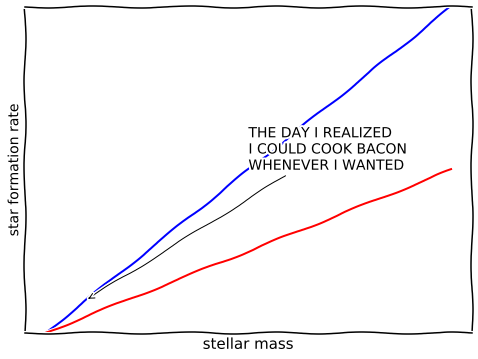

In [138]:
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig, ax= plt.subplots(figsize=(8,6))
    #ax.spines.right.set_color('none')
    #ax.spines.top.set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([0, 1])

    #data = np.ones(100)
    #data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(0.1, 0.1), arrowprops=dict(arrowstyle='->'), xytext=(0.5, 0.50))

    ax.plot([0,1],[0,1],c='b')
    ax.plot([0,1],[0,.5],c='r')

    ax.set_xlabel('stellar mass',fontsize=15)
    ax.set_ylabel('star formation rate')


## Calculating SFR from LOFAR stacked fluxes

In [10]:
def SFR_lofar(flux,flux_unc,z):
    ''' Get 150 MHz luminosity and the SFR, according to the
        mass-independant L150-SFR relationship by Smith et al. 2020
        log10(L150[W Hz^-1]) = 1.058*log10(SFR[Msun/year]) + 22.221
        Also get the total uncertainty in the SFR
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''
    beta=1.058
    beta_unc=0.007
    logL1=22.221
    logL1_unc=0.008    
    # Luminosity in W/Hz
    L150 = (10**-29)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    #log10(L150) = 1.058*log10(SFR) + 22.221
    log10SFR = (np.log10(L150) - logL1)/beta
    SFR = 10**log10SFR
    SFR_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logL1_unc)**2 )*((SFR/beta)**2)
    SFR_unc = (L150_unc/L150)*(SFR/beta)
    
    return L150, SFR, np.sqrt(SFR_unc2), SFR_unc

SFR_lofar_v = np.vectorize(SFR_lofar)

In [11]:
# Mass-independant SFR
results['L150MHZ'], results['SFR_lofar'], results['SFR_lofar_unc'], results['SFR_lofar_error'] = SFR_lofar_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [91]:
# Mass-independant SFR
results_1['L150MHZ'], results_1['SFR_lofar'], results_1['SFR_lofar_unc'], results_1['SFR_lofar_error'] = SFR_lofar_v(results_1['LOFAR_flux(mJy)'],results_1['LOFAR_std(mJy)'],results_1['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
def SFR_lofar_M(flux,flux_unc,mass,z):
    ''' Get 150 MHz luminosity and the SFR, according to the
        mass-dependant L150-SFR relationship by Smith et al. 2020
        log10(L150[W Hz^-1]) = 0.9*log10(SFR[Msun/year]) + 0.33*log10(M[10^10Msun]) + 22.22
        Also get the total uncertainty in the SFR
        https://arxiv.org/pdf/2011.08196v1.pdf
    '''
    beta=0.903
    beta_unc=0.012
    logLc=22.218
    logLc_unc=0.016
    gamma=0.332
    gamma_unc=0.037
    # Luminosity in W/Hz
    L150 = (10**-29)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    L150_unc = (10**-29)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    #log10(L150) = 0.9*log10(SFR) + 0.33*(M-10) + 22.22
    log10SFR = (np.log10(L150) - gamma*(mass-10) - logLc)/beta
    SFR = 10**log10SFR
    
    SFR_unc2 = ( (L150_unc/L150)**2 + (np.log(SFR)*beta_unc)**2 + (np.log(10)*logLc_unc)**2 + (np.log(10)*(10-mass)*gamma_unc)**2 )*((SFR/beta)**2)
    
    return L150, SFR, np.sqrt(SFR_unc2)

SFR_lofar_M_v = np.vectorize(SFR_lofar_M)

In [13]:
# Mass-dependant SFR
results['L150MHZ'], results['SFR_lofar_M'], results['SFR_lofar_M_unc'] = SFR_lofar_M_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_mass'],results['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


In [92]:
# Mass-dependant SFR
results_1['L150MHZ'], results_1['SFR_lofar_M'], results_1['SFR_lofar_M_unc'] = SFR_lofar_M_v(results_1['LOFAR_flux(mJy)'],results_1['LOFAR_std(mJy)'],results_1['Median_mass'],results_1['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
results = results[results['Median_mass']>=9]

In [14]:
def SFR_CR(flux,flux_unc,z):
    ''' Get the SFR from 150 MHz luminosity, according to the
        L150-SFR relationship by Calistro-Rivera et al. 2017
        SFR150MHz [Msun/year] = 1.455*10^-31*10^q150(z)* L150 [erg/s],
        with q150(z) = 1.72*(1+z)**-0.22
        https://arxiv.org/pdf/1704.06268.pdf
    '''
    # Luminosity in erg s^-1 Hz^-1
    Lerg = (10**-22)*flux*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    Lerg_unc = (10**-22)*flux_unc*4*np.pi*(cosmo.luminosity_distance(z).to(u.meter).value)**2
    q = 1.544
    q_unc = 0.019
    a = 1.72
    b = 0.22
    qz = a*(1+z)**-b
    a_unc = 0.04
    b_unc = 0.05
    qz_unc2 = (qz*a_unc/a)**2 + (qz*np.log(1+z)*b_unc)**2
    
    SFR = Lerg*1.455*(10**-31)*(10**q)
    SFRz = Lerg*1.455*(10**-31)*(10**qz)
    
    SFR_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (np.log(10)*q_unc)**2)*((SFR)**2) )
    SFRz_unc = np.sqrt( ((Lerg_unc/Lerg)**2 + (qz_unc2*np.log(10)**2))*((SFRz)**2) )
    
    return SFR, SFR_unc, SFRz, SFRz_unc

SFR_CR_v = np.vectorize(SFR_CR)

In [15]:
# SFR from Calistro-Rivera et al. 2017
results['SFR_CR'], results['SFR_CR_unc'], results['SFR_CRz'], results['SFR_CRz_unc'] = SFR_CR_v(results['LOFAR_flux(mJy)'],results['LOFAR_std(mJy)'],results['Median_redshift'])

In [93]:
# SFR from Calistro-Rivera et al. 2017
results_1['SFR_CR'], results_1['SFR_CR_unc'], results_1['SFR_CRz'], results_1['SFR_CRz_unc'] = SFR_CR_v(results_1['LOFAR_flux(mJy)'],results_1['LOFAR_std(mJy)'],results_1['Median_redshift'])

/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


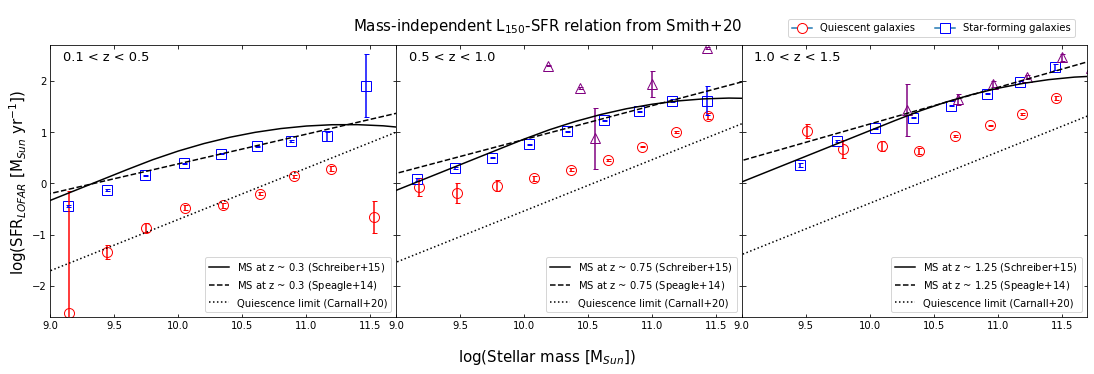

In [19]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

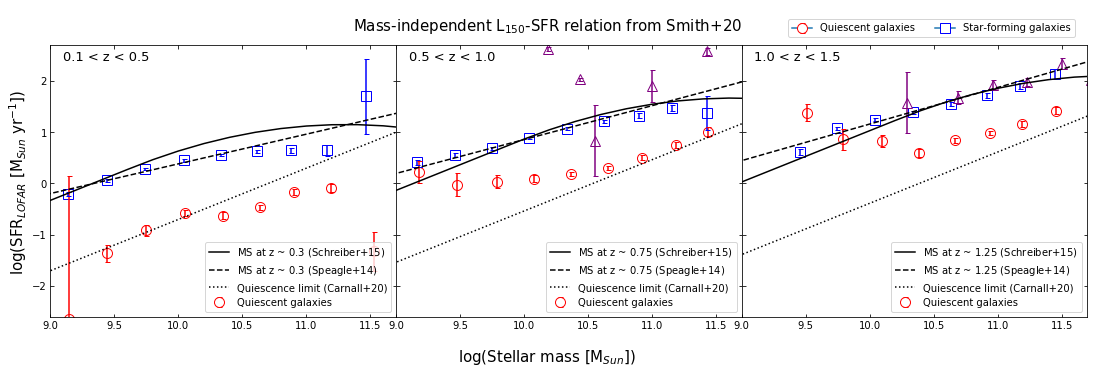

In [23]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot(m,SchreiberMS(m,z),ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,13],[SpeagleMS(8,z),SpeagleMS(13,z)],ls='--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[CarnallQ(8,z),CarnallQ(13,z)],ls=':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
plt.show()

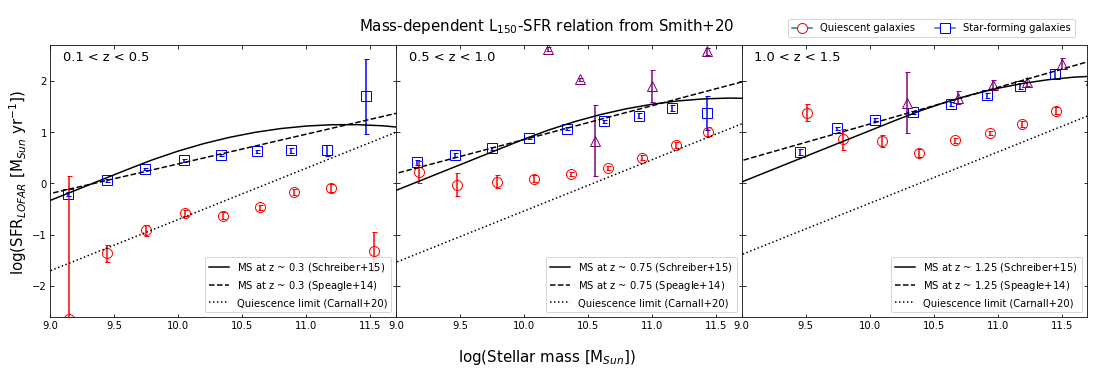

In [81]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


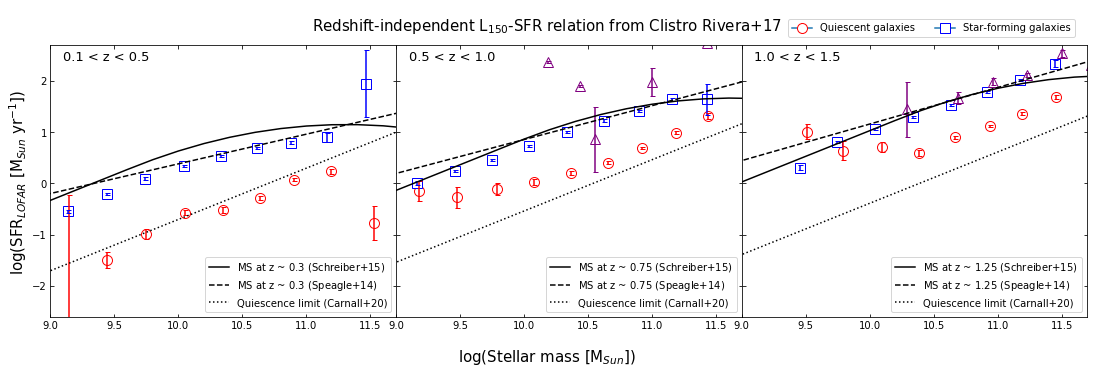

In [87]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_CR_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_CR']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independent L$_{150}$-SFR relation from Clistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


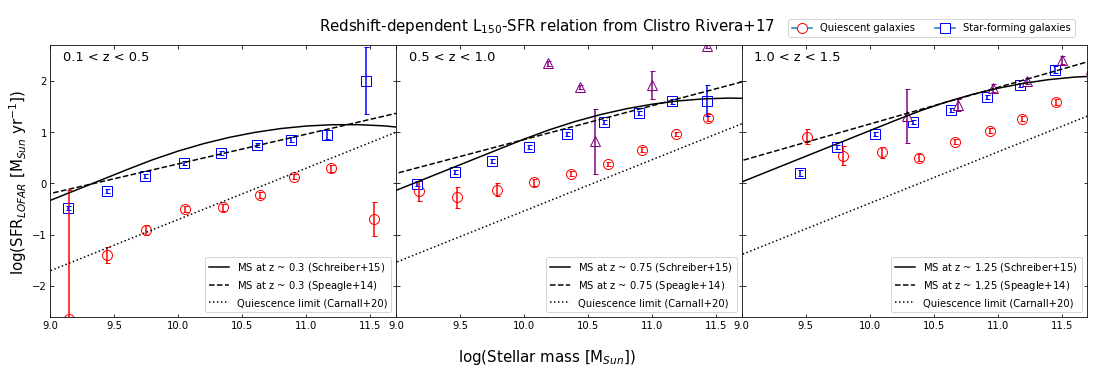

In [88]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_CRz']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependent L$_{150}$-SFR relation from Clistro Rivera+17',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

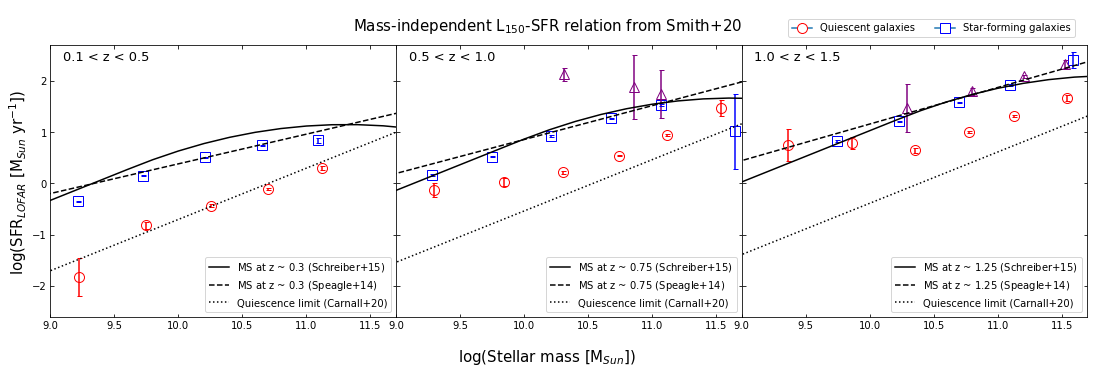

In [94]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results_1[(results_1['Median_redshift']>za)&(results_1['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

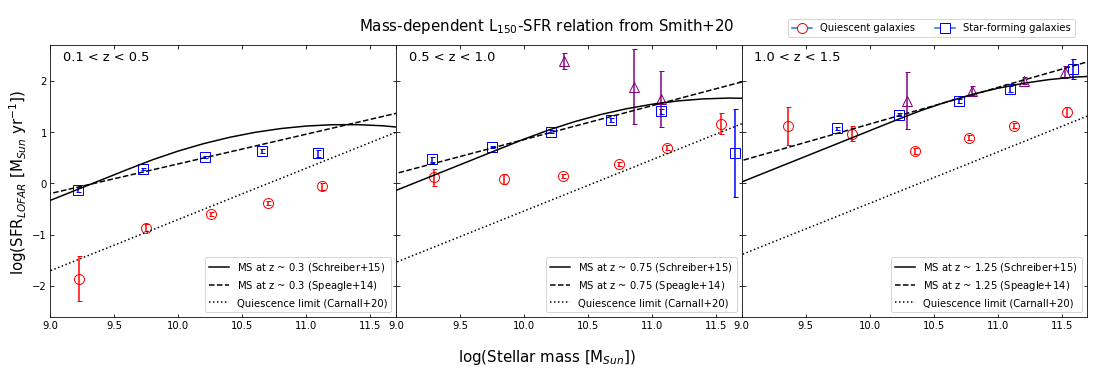

In [95]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results_1[(results_1['Median_redshift']>za)&(results_1['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='_Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='_Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=axs[0].errorbar([],[],[],marker='o',mfc='w',mec='r',ms=10,ecolor='r',label='Quiescent galaxies')
marker2=plt.errorbar([],[],[],marker='s',mfc='w',mec='b',ms=10,ecolor='r',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

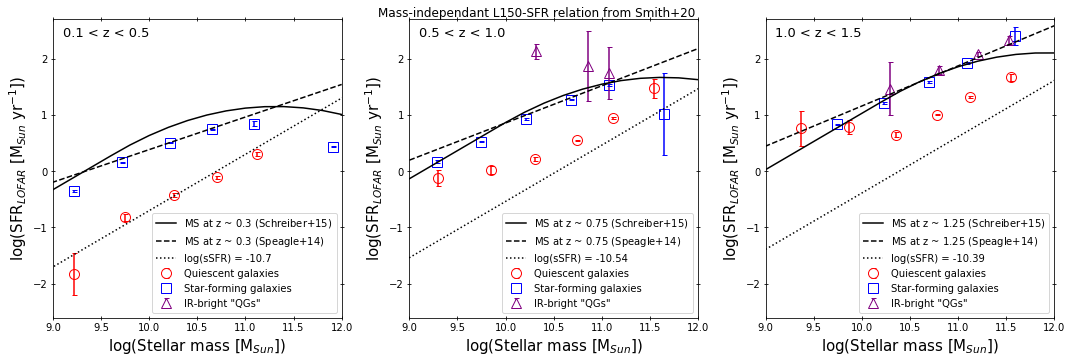

In [21]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=12.)
    axs[i].tick_params(which='both',top=True,right=True,direction='inout')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-independant L150-SFR relation from Smith+20',y=1)
fig.tight_layout()
plt.show()

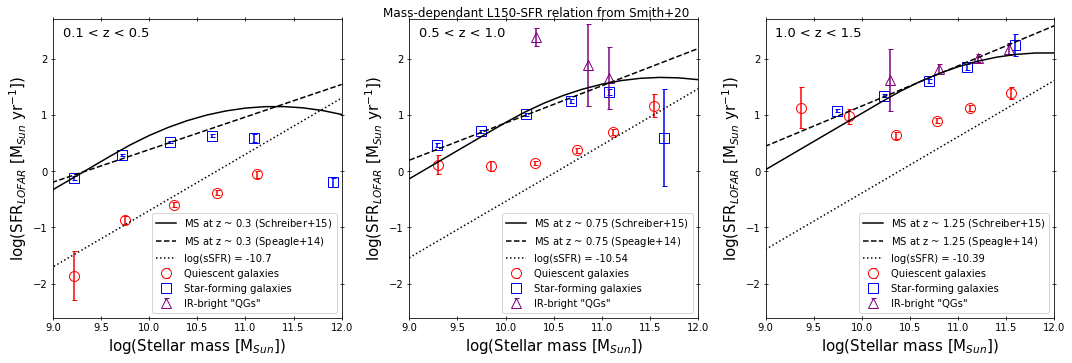

In [22]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=12.)
    axs[i].tick_params(which='both',top=True,right=True,direction='inout')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Mass-dependant L150-SFR relation from Smith+20',y=1)
fig.tight_layout()
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


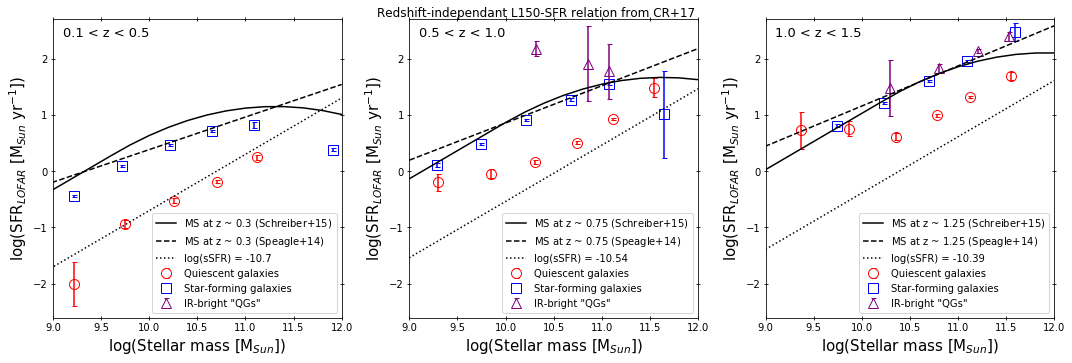

In [25]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CR_unc']/(data.loc[(data['Type']=='QG'),'SFR_CR']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CR_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CR']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_CR']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_CR_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_CR']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=12.)
    axs[i].tick_params(which='both',top=True,right=True,direction='inout')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-independant L150-SFR relation from CR+17',y=1)
fig.tight_layout()
plt.show()

/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


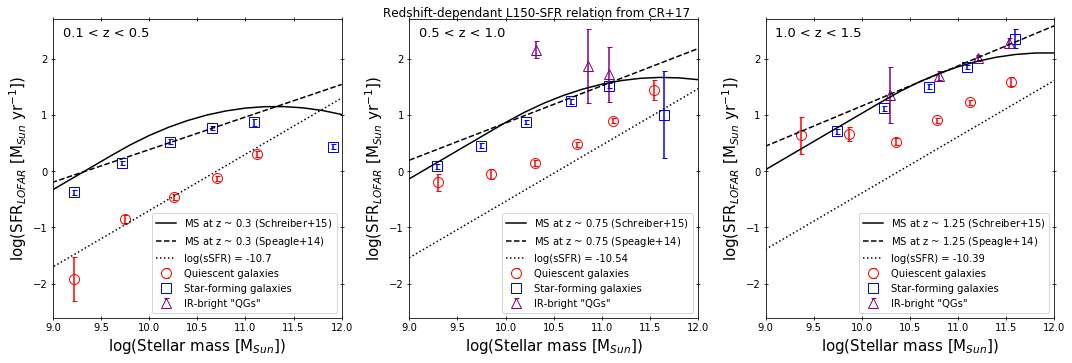

In [26]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='QG'),'SFR_CRz']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='SFG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='SFG'),'SFR_CRz']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_CRz']),
                   yerr=data.loc[(data['Type']=='IRBQG'),'SFR_CRz_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_CRz']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=12.)
    axs[i].tick_params(which='both',top=True,right=True,direction='inout')
    axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('Redshift-dependant L150-SFR relation from CR+17',y=1)
fig.tight_layout()
plt.show()

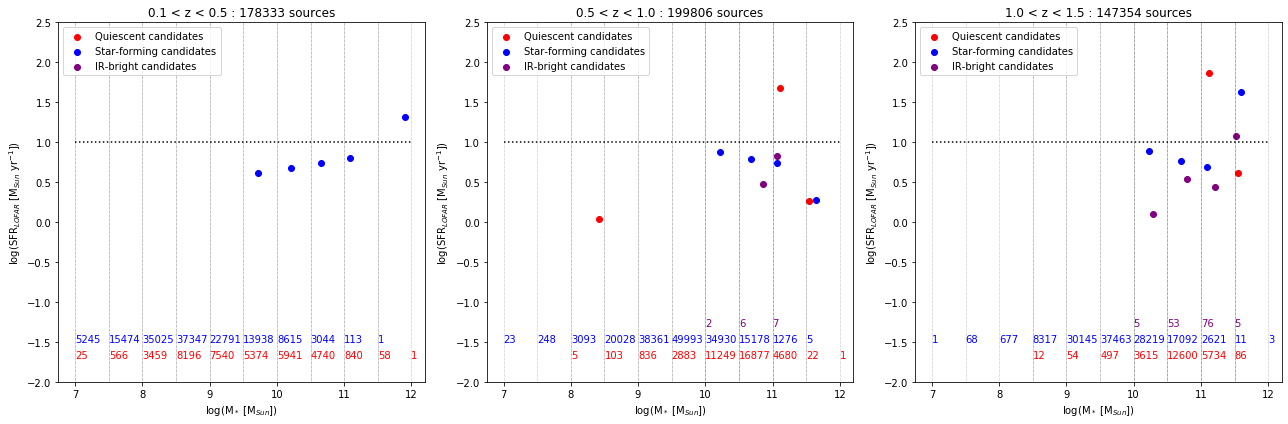

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

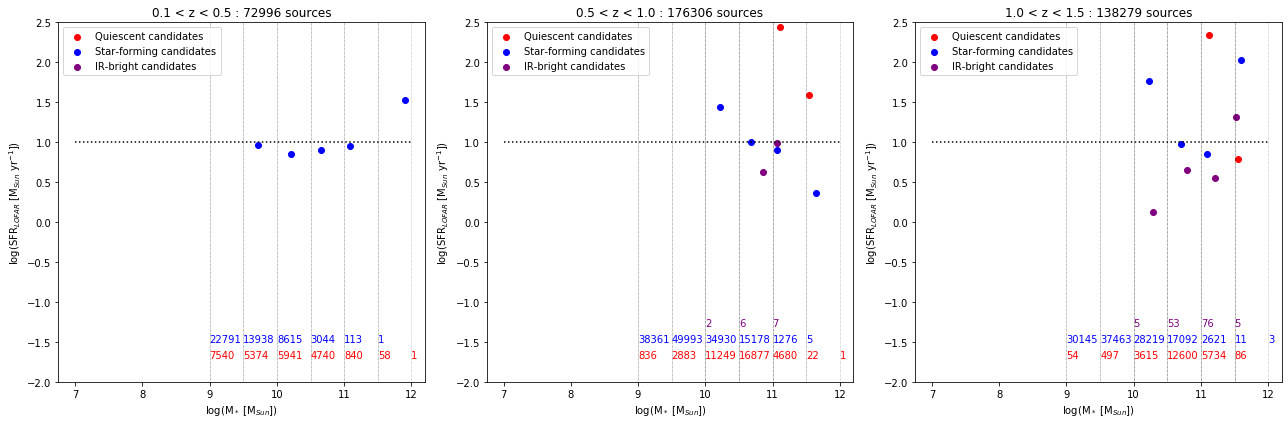

In [85]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

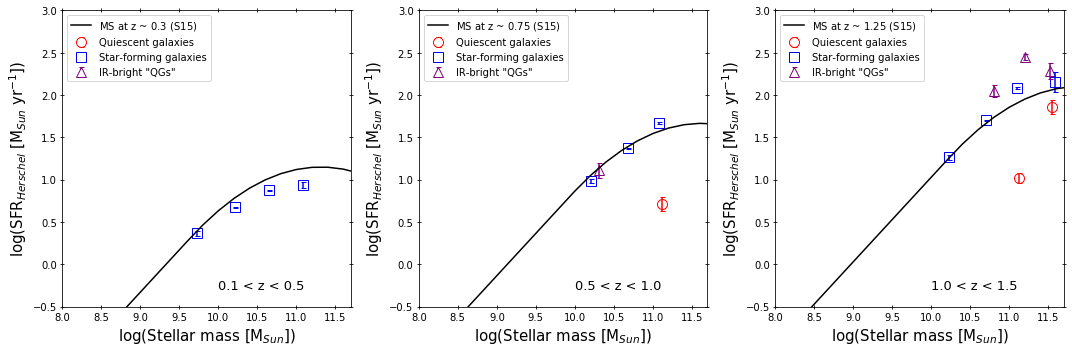

In [67]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']),
                   yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_upper']/(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']*np.log(10)),
                   fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']),
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_upper']/(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']*np.log(10)),
                   fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']),
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_upper']/(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']*np.log(10)),
                   fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    #axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    #axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    #axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].text(10,-0.3,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.5,ymax=3.)
    axs[i].set_xlim(xmin=8,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='inout')
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

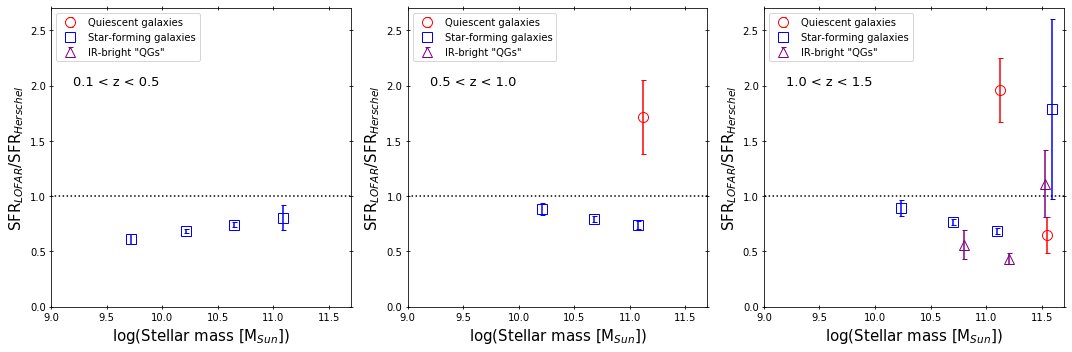

In [74]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("SFR$_{LOFAR}$/SFR$_{Herschel}$",fontsize=15)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].text(9.2,2.,f'{za} < z < {zb}',size=13,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    axs[i].set_ylim(ymin=0,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='inout')
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

## Fitting grey body model to Herschel stacked fluxes to calculate SFR

In [96]:
def GreybodyPL(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for full IR regime
    given by an optically thick grey-body modelmodified with a MIR power-law
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    alpha = 2.0
    beta = 1.5
    Lc = (26.68 + alpha*6.246)**-2 + (1.905*(10**-4) + alpha*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [122]:
def HerschelLIR(z_obj,S1,S2,S3,S4,S5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5])
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        print(z_obj)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,p0=[30,10**4])
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),40,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [123]:
results['Tdust'], results['Norm'], results['LIR_H'] = V_Herschel(results['Median_redshift'],results['100_flux(mJy)'],results['160_flux(mJy)'],results['250_flux(mJy)'],results['350_flux(mJy)'],results['500_flux(mJy)'])

results['SFR_H'] = np.power(10,results['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

0.7329
0.7329
0.7076
1.4252
0.8386
1.4372
0.9338
1.4188
0.92765
1.3935
0.8623
1.422
1.102
0.2337


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


0.598
1.1909999999999998
0.2451
0.6203000000000001
1.1609
0.2918
0.6645
1.19
0.32630000000000003
0.6909
1.1818
0.3611
0.7243
1.1341
0.37925
0.7615
1.14175
0.39575
0.77545
1.1646
0.3815
0.7746
1.1968
0.3278
0.81715
Failed fit
1.2362
0.3209
0.5658000000000001
1.38245
0.3786
0.6287
0.3404
0.7433
1.2455
0.3668
0.7632
1.2109
0.3865
0.77525
1.2031
0.38345
0.7936
1.1974
0.3847
0.8029999999999999
1.18785
0.3861
0.8065
1.2037
0.3956
0.8147
1.2267
0.40325
0.8329
1.2664
0.3605
0.7634
1.32425
0.4055
0.67935
1.3496
1.4276
1.4655


/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [124]:
results_1['Tdust'], results_1['Norm'], results_1['LIR_H'] = V_Herschel(results_1['Median_redshift'],results_1['100_flux(mJy)'],results_1['160_flux(mJy)'],results_1['250_flux(mJy)'],results_1['350_flux(mJy)'],results_1['500_flux(mJy)'])

results_1['SFR_H'] = np.power(10,results_1['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

0.7202500000000001
0.7202500000000001
1.4252
0.8789
1.4240000000000002
0.9126
1.4113
1.3016
0.2362
0.60475
1.1567
0.28745
0.6671
1.1881


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


Failed fit
0.3519
0.7148
1.1428
0.3819
0.7667
1.1498
0.39505
0.7768
1.1885
0.32685
0.8461000000000001
1.24465
0.3786
0.6287
0.3476
0.7521
1.2313
0.3841
0.7763
1.2035
0.3834
0.7998
1.1893
0.38735
0.80765
1.20925
0.4058
0.82655
1.2535
0.4055
0.6659999999999999
1.3491
1.4436


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


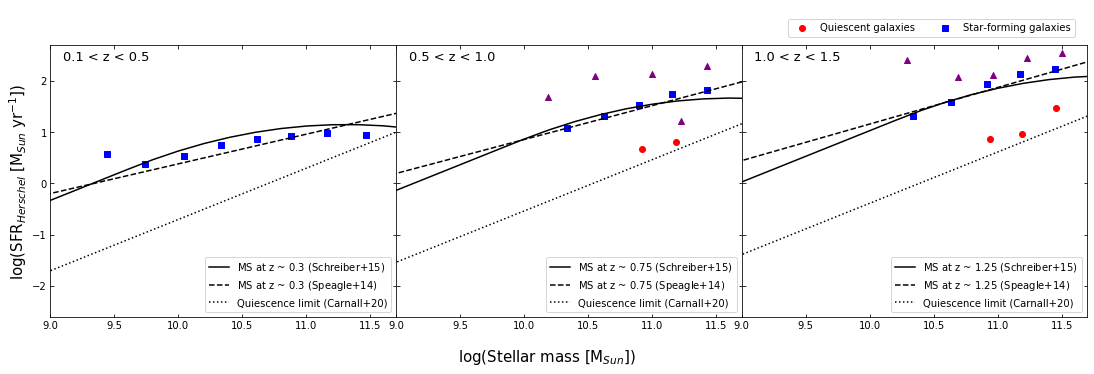

In [118]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].scatter(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   marker='o',color='r',label='_Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   marker='s',color='b',label='_Star-forming galaxies')
    axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_H']),
                   marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
#fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=plt.scatter([],[],marker='o',color='r',label='Quiescent galaxies')
marker2=plt.scatter([],[],marker='s',color='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

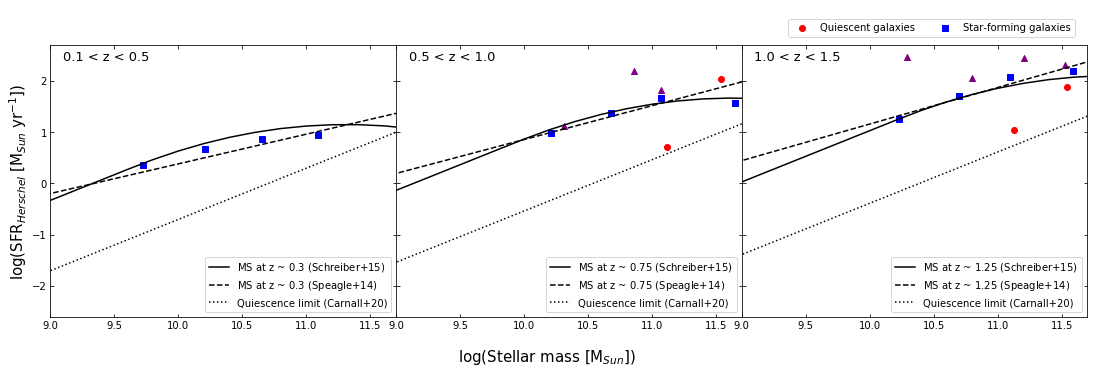

In [119]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results_1[(results_1['Median_redshift']>za)&(results_1['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].scatter(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_H']),
                   marker='o',color='r',label='_Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_H']),
                   marker='s',color='b',label='_Star-forming galaxies')
    axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_H']),
                   marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'Quiescence limit (Carnall+20)')
    count = data['Count'].sum()
    axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-2.6,ymax=2.7)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    axs[i].legend(numpoints=1, loc='lower right')
#fig.suptitle('Mass-independent L$_{150}$-SFR relation from Smith+20',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"log(SFR$_{Herschel}$ [M$_{Sun}$ yr$^{-1}$])", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=plt.scatter([],[],marker='o',color='r',label='Quiescent galaxies')
marker2=plt.scatter([],[],marker='s',color='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

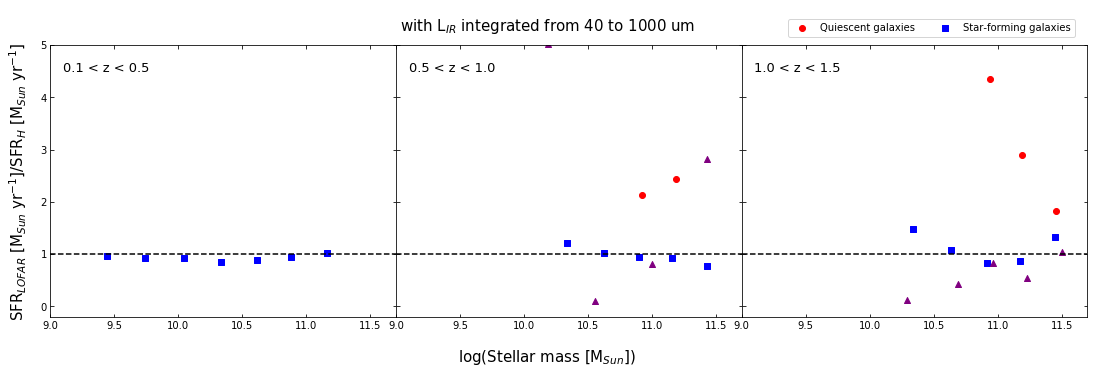

In [125]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(15,5), sharey=True)
for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
    z = (za+zb)/2
    logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
    age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
    factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    #axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
    #axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].scatter(data.loc[(data['Type']=='QG'),'Median_mass'],
                   data.loc[(data['Type']=='QG'),'SFR_lofar']/data.loc[(data['Type']=='QG'),'SFR_H'],
                   marker='o',color='r',label='_Quiescent galaxies')
    axs[i].scatter(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   data.loc[(data['Type']=='SFG'),'SFR_lofar']/data.loc[(data['Type']=='SFG'),'SFR_H'],
                   marker='s',color='b',label='_Star-forming galaxies')
    axs[i].scatter(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar']/data.loc[(data['Type']=='IRBQG'),'SFR_H'],
                   marker='^',color='purple',label='_IR-bright "QGs"')
    axs[i].plot([9,12],[1.,1.], ls='--', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
    count = data['Count'].sum()
    axs[i].text(9.1,4.5,f'{za} < z < {zb}',size=13,color='k')
    axs[i].set_ylim(ymin=-0.2,ymax=5.)
    axs[i].set_xlim(xmin=9,xmax=11.7)
    axs[i].tick_params(which='both',top=True,right=True,direction='in')
    #axs[i].legend(numpoints=1, loc='lower right')
fig.suptitle('with L$_{IR}$ integrated from 40 to 1000 um',fontsize=15,y=0.96)
fig.text(0.5, 0.0,"log(Stellar mass [M$_{Sun}$])", ha='center',fontsize=15)
fig.text(0.0, 0.5,"SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$]/SFR$_{H}$ [M$_{Sun}$ yr$^{-1}$]", va='center',fontsize=15, rotation='vertical')
#fig.supxlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
marker1=plt.scatter([],[],marker='o',color='r',label='Quiescent galaxies')
marker2=plt.scatter([],[],marker='s',color='b',label='Star-forming galaxies')
fig.legend(handles=[marker1,marker2],numpoints=1, loc='upper right',bbox_to_anchor=(1,1),ncol=2)
fig.subplots_adjust(left=0.04,right=1,wspace=0)
#fig.tight_layout()
plt.show()

In [23]:
results.loc[results['Type']=='QG',['Type','Median_mass','Median_redshift','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Median_redshift,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
7,QG,7.396254,0.10810,25,2.142651,-0.918384,-1.450049,-2.196473,-1.760863,9.903583,-1.519727e+07,NaN,NaN
8,QG,7.878830,0.13380,566,-0.469347,-1.548605,-4.205962,-4.225476,-3.127843,12.355275,-1.295639e+07,NaN,NaN
9,QG,8.330666,0.16830,3459,-0.713437,-1.399611,-4.386699,-4.398244,-3.264557,12.610062,-1.236289e+07,NaN,NaN
10,QG,8.418305,0.58910,5,7.485112,16.293940,10.316931,3.798884,-3.188293,44.782064,3.349559e+05,11.445926,28.317136
11,QG,8.774096,0.21395,8196,-0.506248,-0.718568,-3.629884,-3.835489,-2.769702,12.509793,-1.070814e+07,NaN,NaN
12,QG,8.900928,0.55270,103,-0.107663,2.501810,-4.109107,-4.473516,-4.037006,13.431518,-9.499821e+06,NaN,NaN
13,QG,8.873606,1.21005,12,6.327036,8.191111,-3.981578,-6.227388,-7.100859,15.705466,-7.650154e+06,NaN,NaN
14,QG,9.222692,0.23620,7540,-0.229001,-0.304992,-3.031185,-3.254304,-2.298415,12.417690,-9.164839e+06,NaN,NaN
15,QG,9.300395,0.60475,836,-0.617940,0.743344,-2.730223,-3.115373,-2.246494,15.305761,-3.636780e+06,NaN,NaN
16,QG,9.363929,1.15670,54,-1.372976,2.851619,-2.966707,-4.639767,-4.056477,18.010624,-2.903216e+06,NaN,NaN


In [75]:
results.loc[results['Type']=='SFG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
46,SFG,9.216966,22791,0.372953,1.266977,-1.603335,-2.260958,-1.734612,11.107438,-9.366262e+06,NaN,NaN
47,SFG,9.283014,38361,-0.025578,0.103194,-2.233316,-2.426758,-1.838325,17.576201,-1.699210e+06,NaN,NaN
48,SFG,9.291921,30145,-0.352813,-0.470742,-3.302285,-3.422198,-2.517921,25.339004,-6.120513e+05,NaN,NaN
49,SFG,9.721506,13938,1.696732,3.090944,0.318797,-1.401116,-1.513301,64.839972,1.685560e+04,10.359862,2.322660
50,SFG,9.746766,49993,0.221658,0.653499,-1.461418,-1.949673,-1.698616,15.326601,-2.338239e+06,NaN,NaN
51,SFG,9.742299,37463,-0.141427,0.034233,-1.948900,-2.040053,-1.482636,23.826012,-4.484432e+05,NaN,NaN
52,SFG,10.211585,8615,4.282728,8.405123,5.139538,1.330739,-0.482059,38.618891,2.894364e+05,10.667703,4.718740
53,SFG,10.211694,34930,0.970682,2.159370,0.853935,-0.292073,-0.898986,67.314698,1.014986e+04,10.973451,9.540565
54,SFG,10.230150,28219,0.480205,1.571669,0.132587,-0.001898,-0.152188,83.022712,3.175211e+03,11.257574,18.352565
55,SFG,10.649314,3044,6.461922,12.876568,10.914683,4.757299,0.912142,33.241803,8.431636e+05,10.865371,7.438656


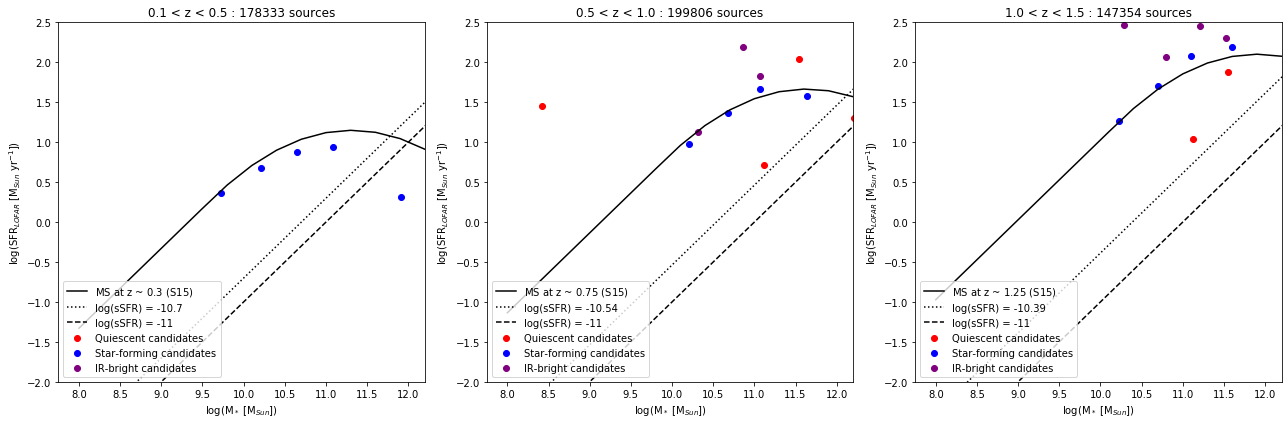

In [25]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='lower left')
fig.tight_layout()
plt.show()

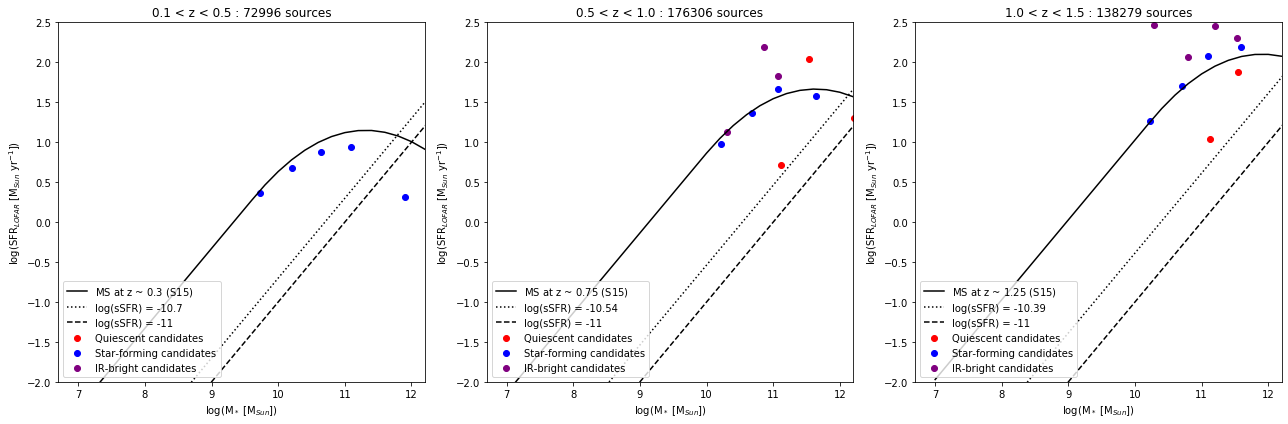

In [71]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='lower left')
fig.tight_layout()
plt.show()

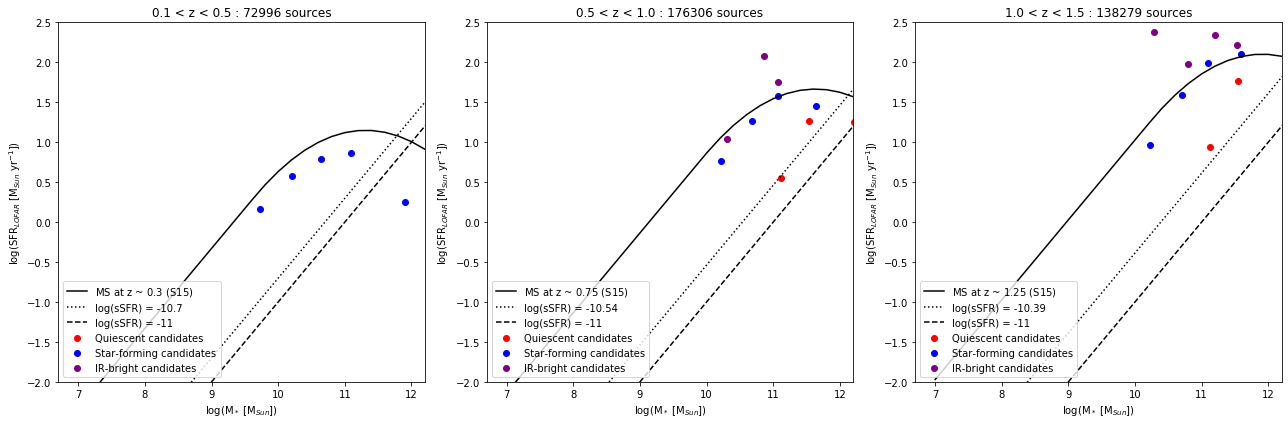

In [84]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='lower left')
fig.tight_layout()
plt.show()

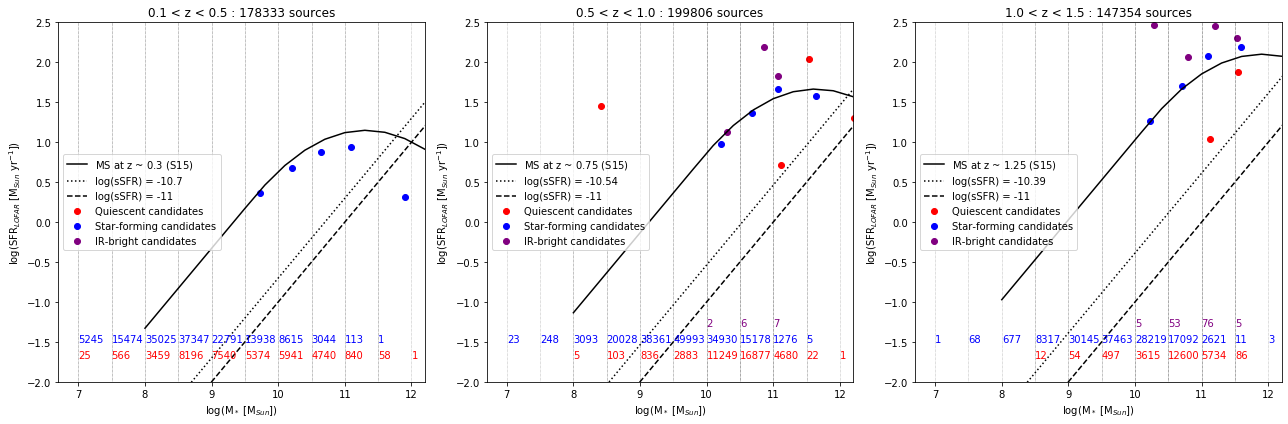

In [28]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='center left')
fig.tight_layout()
plt.show()

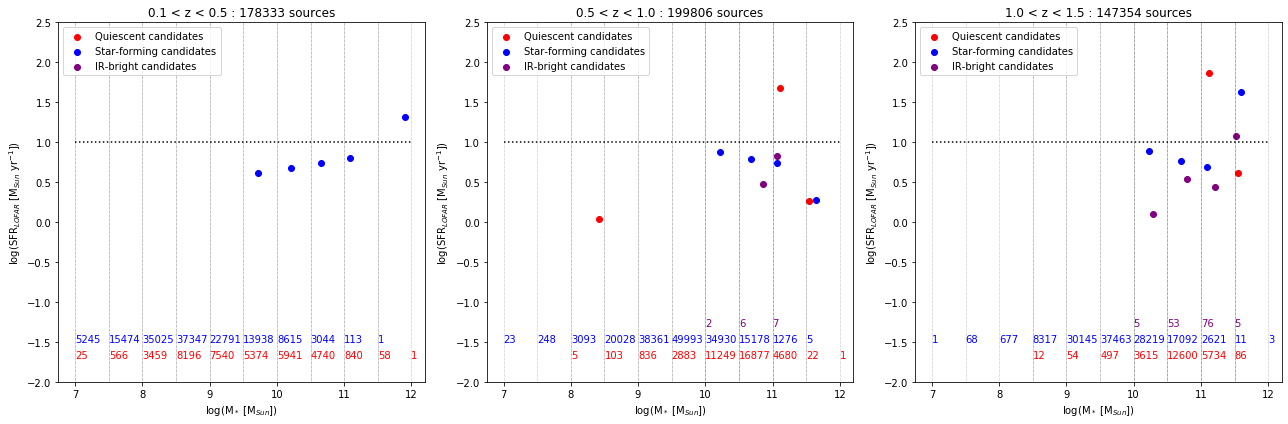

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

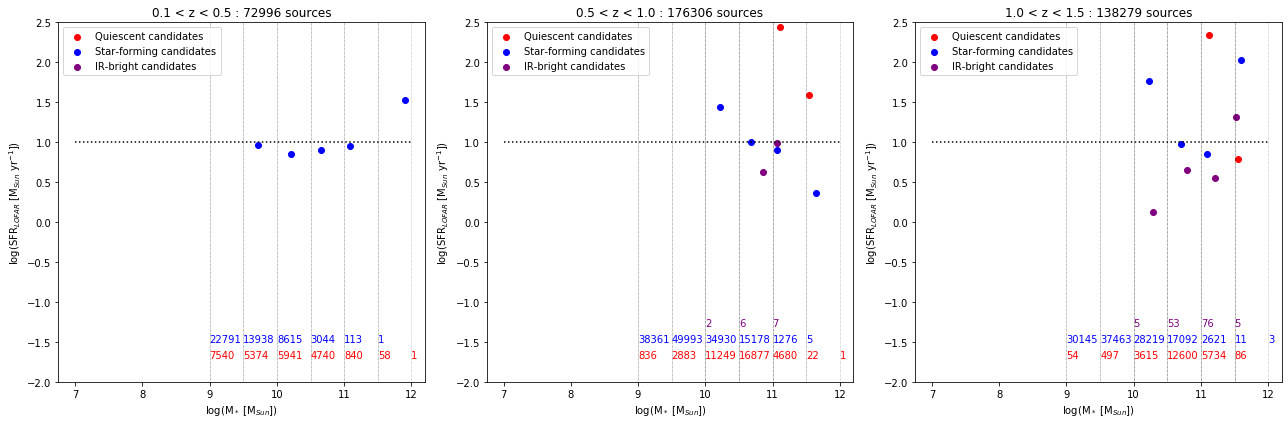

In [85]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

In [37]:
### FOR TRIAL USE

def HerschelLIR(z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    dlist=np.array([z_obj,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5])
    if (~np.isfinite(dlist)).any():
        print('Failed nan check')
        return np.nan, np.nan, np.nan
    else:            
        x_data = np.array([100.,160.,250.,350.,500.])
        y_data = np.array([S1,S2,S3,S4,S5])*10**-3 # data in mJy
        y_err = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3
        print(z_obj)
        try:
            popt, pcov = curve_fit(GreybodyPL,x_data/(1+z_obj),y_data,sigma=y_err,absolute_sigma=True,p0=[30,10**4])#,bounds=([10,100],[100,np.inf]))
        except RuntimeError:
            print('Failed fit')
            return np.nan, np.nan, np.nan
        dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
        integral, abserr = quad(lambda x: GreybodyPL(x,popt[0],popt[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
        LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
        LIR_LSun = LIR/(3.828*10**26)
    
        return popt[0], popt[1], np.log10(LIR_LSun)

V_Herschel = np.vectorize(HerschelLIR)

In [38]:
for i in range(len(results)):
    results.loc[i,'Tdust'], results.loc[i,'Norm'], results.loc[i,'LIR_H'] = HerschelLIR(results.loc[i,'Median_redshift'],results.loc[i,'100_flux(mJy)'],results.loc[i,'160_flux(mJy)'],results.loc[i,'250_flux(mJy)'],results.loc[i,'350_flux(mJy)'],results.loc[i,'500_flux(mJy)'],results.loc[i,'100_std(mJy)'],results.loc[i,'160_std(mJy)'],results.loc[i,'250_std(mJy)'],results.loc[i,'350_std(mJy)'],results.loc[i,'500_std(mJy)'])

results['SFR_H'] = np.power(10,results['LIR_H'])/(1.7*5.8*10**9) # Kennicutt 1998 + Man 2016

0.7202500000000001
1.4252
0.8789
1.4240000000000002
0.9126
1.4113
1.3016
0.1081
0.1338
0.1683
0.5891
0.21395
0.5527


/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


1.21005
0.2362
0.60475
1.1567
0.28745
0.6671
1.1881
Failed fit
0.3519
0.7148
1.1428
0.3819
0.7667
1.1498
0.39505
0.7768
1.1885
0.32685
0.8461000000000001
1.24465
0.3786
0.6287
0.172
0.5278
1.053
0.2141
0.6289
1.22385
0.2866
0.5926
1.2886
0.3199
0.6636
1.2483
0.3476
0.7521
1.2313
0.3841
0.7763
1.2035
0.3834
0.7998
1.1893
0.38735
0.80765
1.20925
0.4058
0.82655
1.2535
0.4055
0.6659999999999999
1.3491
1.4436


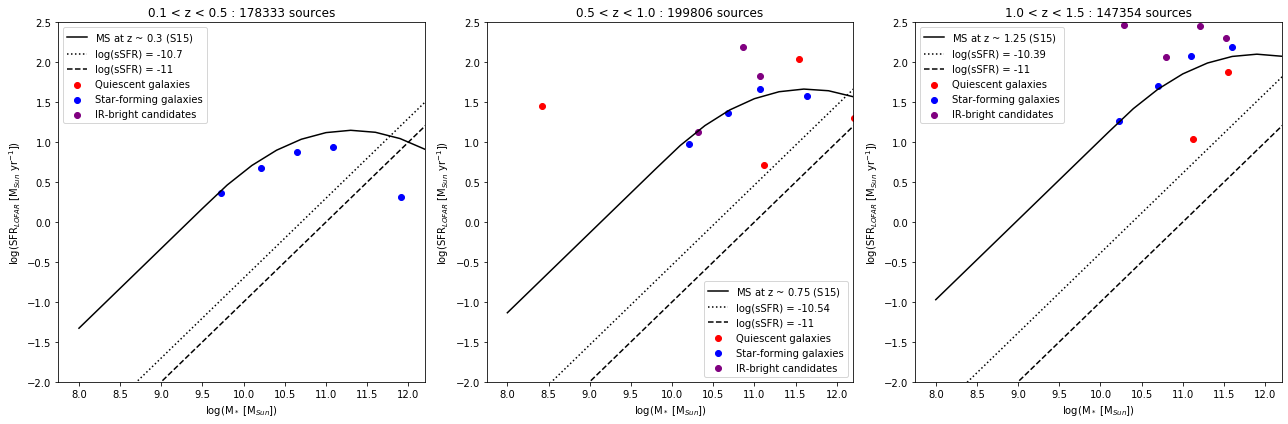

In [87]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='r',label='Quiescent galaxies')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='b',label='Star-forming galaxies')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

In [39]:
results

,Type,Mass_range,Median_mass,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),160_flux(mJy),160_std(mJy),...,500_std(mJy),L150MHZ,SFR_lofar,SFR_lofar_unc,SFR_lofar_M,SFR_lofar_M_unc,LIR_H,Tdust,Norm,SFR_H
0,QG,8.0 - 8.5,8.298146,6,-0.010194,0.035734,2.586846,4.587284,-8.781093,4.587284,...,4.587284,-1.231256e+22,NaN,NaN,NaN,NaN,NaN,0.964873,-1.236403e+04,NaN
1,QG,8.5 - 9.0,8.847066,69,0.004709,0.010106,-0.190909,1.146867,2.393843,1.146867,...,1.146867,5.687386e+21,0.362630,0.735656,0.814816,1.938960,NaN,14.276700,-4.362372e+06,NaN
2,QG,9.0 - 9.5,9.282404,165,0.000714,0.007158,0.167033,1.008490,2.282045,1.008490,...,1.008490,8.627415e+20,0.061000,0.577841,0.069822,0.774955,NaN,12.806063,-6.260813e+06,NaN
3,QG,9.5 - 10.0,9.857409,454,0.009039,0.004028,-0.561699,0.515735,-1.766767,0.515735,...,0.515735,1.091825e+22,0.671702,0.283139,0.713279,0.353312,NaN,24.552341,-4.387472e+05,NaN
4,QG,10.0 - 10.5,10.286428,1553,0.018064,0.002191,0.039514,0.291565,1.218774,0.291565,...,0.291565,2.181932e+22,1.292353,0.149879,1.067857,0.152666,NaN,13.658246,-3.458050e+06,NaN
5,QG,10.5 - 11.0,10.736360,1959,0.021388,0.002260,0.067381,0.274995,1.605872,0.274995,...,0.274995,2.583410e+22,1.516045,0.153745,0.879672,0.124980,NaN,11.448948,-8.287936e+06,NaN
6,QG,11.0 - 11.5,11.143562,696,0.080329,0.005637,0.872754,0.437448,2.570056,0.437448,...,0.437448,9.702718e+22,5.295498,0.367784,2.697998,0.376927,10.510330,45.985983,4.109800e+04,3.284375
7,QG,11.5 - 12.0,11.604734,32,0.255844,0.050966,1.597232,2.022864,6.945698,2.022864,...,2.022864,3.090277e+23,15.828161,3.006872,6.586171,1.790194,10.936460,33.394992,4.218787e+05,8.761592
8,SFG,7.0 - 7.5,7.347608,35,0.008189,0.016270,2.657251,2.404379,1.154487,2.404379,...,2.404379,9.890732e+21,0.611794,1.149031,5.351627,11.854327,NaN,16.326728,-1.473622e+06,NaN
9,SFG,7.5 - 8.0,7.829619,138,0.004970,0.007678,1.253232,0.934723,-3.703522,0.934723,...,0.934723,6.002990e+21,0.381622,0.557277,2.046973,3.528014,NaN,17.628764,-3.449186e+06,NaN


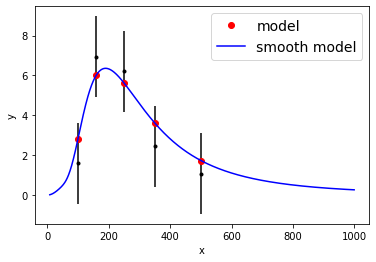

In [71]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[7,'100_flux(mJy)'],results_1.loc[7,'160_flux(mJy)'],results_1.loc[7,'250_flux(mJy)'],results_1.loc[7,'350_flux(mJy)'],results_1.loc[7,'500_flux(mJy)']])
yerr = np.array([results_1.loc[7,'100_std(mJy)'],results_1.loc[7,'160_std(mJy)'],results_1.loc[7,'250_std(mJy)'],results_1.loc[7,'350_std(mJy)'],results_1.loc[7,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results_1.loc[7,'Tdust'],results_1.loc[7,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results_1.loc[7,'Tdust'],results_1.loc[7,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

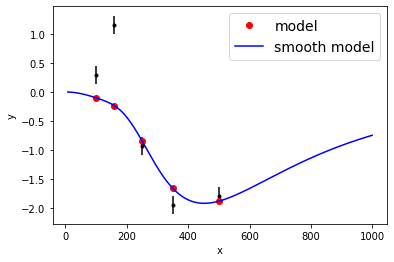

In [31]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[13,'100_flux(mJy)'],results_1.loc[13,'160_flux(mJy)'],results_1.loc[13,'250_flux(mJy)'],results_1.loc[13,'350_flux(mJy)'],results_1.loc[13,'500_flux(mJy)']])
yerr = np.array([results_1.loc[13,'100_std(mJy)'],results_1.loc[13,'160_std(mJy)'],results_1.loc[13,'250_std(mJy)'],results_1.loc[13,'350_std(mJy)'],results_1.loc[13,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results_1.loc[13,'Tdust'],results_1.loc[13,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results_1.loc[13,'Tdust'],results_1.loc[13,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

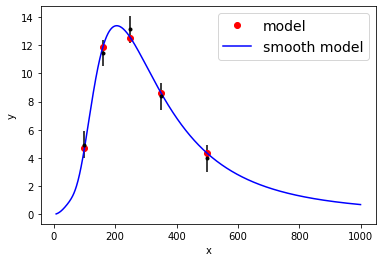

In [75]:
###### x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x,GreybodyPL(x/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "or", label="model")
plt.plot(x_new,GreybodyPL(x_new/(1.55),results_1.loc[16,'Tdust'],results_1.loc[16,'Norm'])*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [75]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR_median,SFR_median,SFR_lower,SFR_upper,SFR_ratio,SFR_ratio_unc
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,...,33.634575,3.221080e+05,11.117570,13.295151,11.104009,12.886405,2.701709e+00,2.678260e+00,10.393801,3.795748
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,...,34.254224,1.203903e+06,12.455823,289.698417,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,...,43.350520,7.910085e+05,12.185842,155.583906,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,...,29.926517,8.600684e+05,12.055358,115.207692,12.040085,111.226523,1.741421e+01,1.929039e+01,0.560091,0.132476
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,...,28.370336,1.893867e+06,11.818673,66.802953,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,...,36.259729,5.400867e+05,12.075225,120.600254,12.074674,120.447313,2.501175e+00,2.340716e+00,0.684602,0.028638
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,...,23.132104,1.039167e+06,10.307555,2.059103,10.307581,2.059226,1.538653e-08,1.560557e-08,1.312307,0.024424
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,...,45.643185,3.048674e+05,11.568974,37.592118,NaN,NaN,NaN,NaN,NaN,NaN
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,...,37.820399,4.900343e+05,12.189515,156.905335,12.147539,142.449788,2.975087e+01,3.947017e+01,1.788583,0.816820


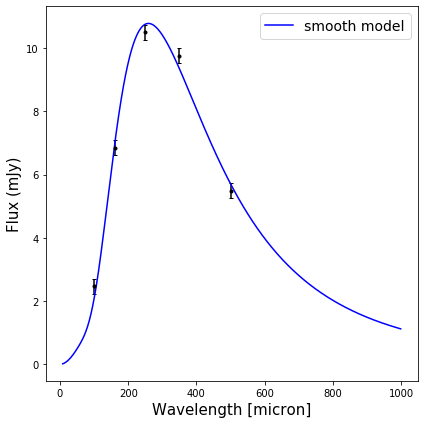

In [141]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[60,'100_flux(mJy)'],results.loc[60,'160_flux(mJy)'],results.loc[60,'250_flux(mJy)'],results.loc[60,'350_flux(mJy)'],results.loc[60,'500_flux(mJy)']])
yerr = np.array([results.loc[60,'100_std(mJy)'],results.loc[60,'160_std(mJy)'],results.loc[60,'250_std(mJy)'],results.loc[60,'350_std(mJy)'],results.loc[60,'500_std(mJy)']])
x_new = np.arange(8,1000)

fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(x, y, yerr=yerr, fmt=".k", capsize=2)
#ax.plot(x,GreybodyPL(x/(1+results.loc[60,'Median_redshift']),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "or", label="model")
ax.plot(x_new,GreybodyPL(x_new/(1+results.loc[60,'Median_redshift']),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "b", label="smooth model")
ax.legend(fontsize=14)
#plt.xlim(0, 10)
ax.set_xlabel("Wavelength [micron]",size=15)
ax.set_ylabel("Flux (mJy)",size=15)
fig.tight_layout()
plt.show()

In [98]:
def Greybody(x,T,Nbb):
    '''Flux density in Jy at wavelength x in micron
    for dust-dominated FIR regime
    given by an optically thick grey-body model
    T is the temperature of the grey body and 
    Nbb is a normalization parameter'''
    beta = 1.5
    flux = Nbb*((1-np.exp(-(200/x)**beta))*(x**-3))/(np.exp(14387.8/(x*T))-1)
    return flux

In [116]:
def PL(x,Lc,Npl):
    '''Flux density in Jy at wavelength x in micron
    for PAH-dominated MIR regime
    given by a power-law
    Lc is the turnover wavelength 
    Nbl is a normalization parameter'''
    alpha = 2.0
    #flux = Npl*np.exp(-(x/(Lc*3/4))**2)*(x/Lc)**alpha
    flux = Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**alpha
    return flux

In [142]:
results[results['Type']=='QG']

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR_median,SFR_median,SFR_lower,SFR_upper,SFR_ratio,SFR_ratio_unc
7,QG,7.0 - 7.5,7.396254,0.0 - 0.5,0.10810,25,0.028863,1.835218e-02,2.142651,3.212565e+00,...,9.903583,-1.519727e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,QG,7.5 - 8.0,7.878830,0.0 - 0.5,0.13380,566,-0.012800,3.567809e-03,-0.469347,4.823754e-01,...,12.355275,-1.295639e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,QG,8.0 - 8.5,8.330666,0.0 - 0.5,0.16830,3459,-0.007489,1.305455e-03,-0.713437,2.016432e-01,...,12.610062,-1.236289e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,QG,8.0 - 8.5,8.418305,0.5 - 1.0,0.58910,5,0.014033,1.064069e-01,7.485112,1.147418e+01,...,44.782064,3.349559e+05,11.445926,28.317135,NaN,NaN,NaN,NaN,NaN,NaN
11,QG,8.5 - 9.0,8.774096,0.0 - 0.5,0.21395,8196,-0.006551,9.077012e-04,-0.506248,1.261540e-01,...,12.509793,-1.070814e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,QG,8.5 - 9.0,8.900928,0.5 - 1.0,0.55270,103,-0.004035,7.502939e-03,-0.107663,1.241604e+00,...,13.431518,-9.499820e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,QG,8.5 - 9.0,8.873606,1.0 - 1.5,1.21005,12,0.002120,2.544662e-02,6.327036,3.883615e+00,...,15.705467,-7.650151e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,QG,9.0 - 9.5,9.222692,0.0 - 0.5,0.23620,7540,0.001154,1.035482e-03,-0.229001,1.271118e-01,...,12.417690,-9.164839e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,QG,9.0 - 9.5,9.300395,0.5 - 1.0,0.60475,836,0.008140,2.728543e-03,-0.617940,4.113322e-01,...,15.305761,-3.636780e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,QG,9.0 - 9.5,9.363929,1.0 - 1.5,1.15670,54,0.014073,1.064062e-02,-1.372976,1.314249e+00,...,18.010624,-2.903216e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


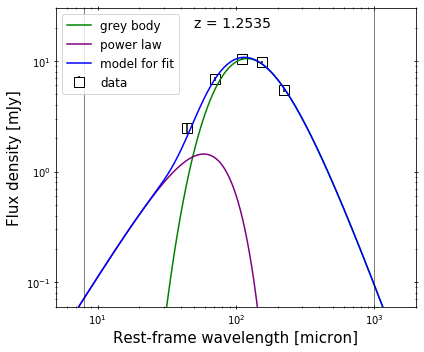

In [139]:
T = results.loc[60,'Tdust']
alpha = 2.0
beta = 1.5
Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
Npl = results.loc[60,'Norm']*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)

x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[60,'100_flux(mJy)'],results.loc[60,'160_flux(mJy)'],results.loc[60,'250_flux(mJy)'],results.loc[60,'350_flux(mJy)'],results.loc[60,'500_flux(mJy)']])
yerr = np.array([results.loc[60,'100_std(mJy)'],results.loc[60,'160_std(mJy)'],results.loc[60,'250_std(mJy)'],results.loc[60,'350_std(mJy)'],results.loc[60,'500_std(mJy)']])
x_new = np.arange(8,5000)
z = results.loc[60,'Median_redshift']

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_new/(1+z),Greybody(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "g", label="grey body")
ax.plot(x_new/(1+z),PL(x_new/(1+z),Lc,Npl)*10**3,"purple",label='power law')
ax.plot(x_new/(1+z),GreybodyPL(x_new/(1+z),results.loc[60,'Tdust'],results.loc[60,'Norm'])*10**3, "b", label="model for fit")
ax.errorbar(x/(1+z), y, yerr=yerr,fmt='s',mfc='w',mec='k',ms=10,ecolor='k',barsabove=True,capsize=0,label='data')
ax.axvline(8,0,1,lw=1,c='k',alpha=0.5)
ax.axvline(1000,0,1,lw=1,c='k',alpha=0.5)
ax.text(50,20,f'z = {z}',size=14)
ax.set_xlabel("Rest-frame wavelength [micron]",size=15)
ax.set_ylabel("Flux density [mJy]",size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=5,xmax=2000)
ax.set_ylim(ymin=0.06,ymax=30)
ax.tick_params(which='both',top=True,right=True,direction='inout')
ax.legend(fontsize=12,loc='upper left')
fig.tight_layout()
plt.show()

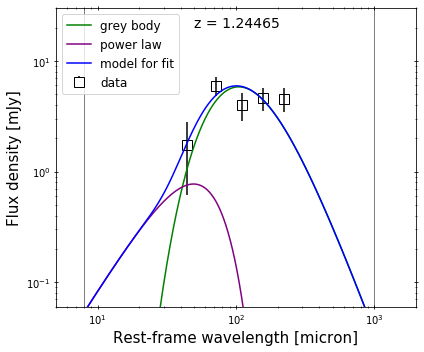

In [143]:
T = results.loc[31,'Tdust']
alpha = 2.0
beta = 1.5
Lc = (26.6764 + alpha*6.24629)**-2 + (1.9053*(10**-4) + alpha*7.24277*(10**-5))*T # 1/turnover_wavelength
Npl = results.loc[31,'Norm']*((1-np.exp(-(200*Lc)**beta))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)

x = np.array([100.,160.,250.,350.,500.])
y = np.array([results.loc[31,'100_flux(mJy)'],results.loc[31,'160_flux(mJy)'],results.loc[31,'250_flux(mJy)'],results.loc[31,'350_flux(mJy)'],results.loc[31,'500_flux(mJy)']])
yerr = np.array([results.loc[31,'100_std(mJy)'],results.loc[31,'160_std(mJy)'],results.loc[31,'250_std(mJy)'],results.loc[31,'350_std(mJy)'],results.loc[31,'500_std(mJy)']])
x_new = np.arange(8,5000)
z = results.loc[31,'Median_redshift']

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(x_new/(1+z),Greybody(x_new/(1+z),results.loc[31,'Tdust'],results.loc[31,'Norm'])*10**3, "g", label="grey body")
ax.plot(x_new/(1+z),PL(x_new/(1+z),Lc,Npl)*10**3,"purple",label='power law')
ax.plot(x_new/(1+z),GreybodyPL(x_new/(1+z),results.loc[31,'Tdust'],results.loc[31,'Norm'])*10**3, "b", label="model for fit")
ax.errorbar(x/(1+z), y, yerr=yerr,fmt='s',mfc='w',mec='k',ms=10,ecolor='k',barsabove=True,capsize=0,label='data')
ax.axvline(8,0,1,lw=1,c='k',alpha=0.5)
ax.axvline(1000,0,1,lw=1,c='k',alpha=0.5)
ax.text(50,20,f'z = {z}',size=14)
ax.set_xlabel("Rest-frame wavelength [micron]",size=15)
ax.set_ylabel("Flux density [mJy]",size=15)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=5,xmax=2000)
ax.set_ylim(ymin=0.06,ymax=30)
ax.tick_params(which='both',top=True,right=True,direction='inout')
ax.legend(fontsize=12,loc='upper left')
fig.tight_layout()
plt.show()

## Using emcee to estimate uncertainties on SFR derived from Herschel stacking


In [39]:
def model(theta,x):
    T, Nbb = theta
    a = 2.0
    b = 1.5
    Lc = (26.68 + a*6.246)**-2 + (1.905*(10**-4) + a*7.243*(10**-5))*T # 1/turnover_wavelength
    Npl = Nbb*((1-np.exp(-(200*Lc)**b))*(Lc**3))/(np.exp(14387.8*Lc/T)-1)
    flux = Nbb*((1-np.exp(-(200/x)**b))*(x**-3))/(np.exp(14387.8/(x*T))-1) + Npl*np.exp(-(x*Lc*4/3)**2)*(x*Lc)**a
    return flux

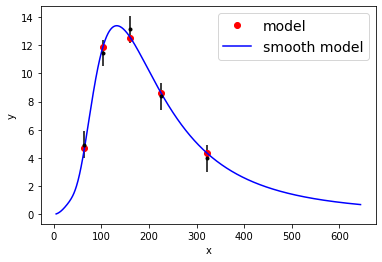

In [76]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x/1.55, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x/1.55,model((results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']),x/(1.55))*10**3, "or", label="model")
plt.plot(x_new/1.55,model((results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']),x_new/(1.55))*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

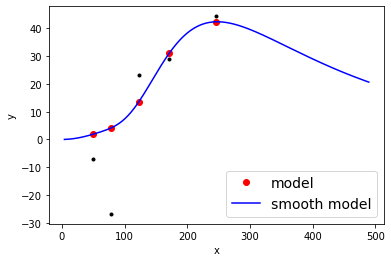

In [163]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_2.loc[0,'100_flux(mJy)'],results_2.loc[0,'160_flux(mJy)'],results_2.loc[0,'250_flux(mJy)'],results_2.loc[0,'350_flux(mJy)'],results_2.loc[0,'500_flux(mJy)']])
yerr = np.array([results_2.loc[0,'100_std(mJy)'],results_2.loc[0,'160_std(mJy)'],results_2.loc[0,'250_std(mJy)'],results_2.loc[0,'350_std(mJy)'],results_2.loc[0,'500_std(mJy)']])

x_new = np.arange(8,1000)
plt.errorbar(x/2.04, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x/2.04,model((results_2.loc[0,'Tdust'],results_2.loc[0,'Norm']),x/(2.04))*10**3, "or", label="model")
plt.plot(x_new/2.04,model((results_2.loc[0,'Tdust'],results_2.loc[0,'Norm']),x_new/(2.04))*10**3, "b", label="smooth model")
plt.legend(fontsize=14)
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [40]:
def log_likelihood(theta, x, y, yerr):
    model1 = model(theta,x)    
    lnlike = -0.5 * np.sum( (y-model1)**2 / yerr**2 )    
    return lnlike

In [41]:
def log_prior(theta):
    T, Nbb = theta
    if 0. < T < 100. and 0. < Nbb:
        return 0.0
    return -np.inf

In [42]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [78]:
x = np.array([100.,160.,250.,350.,500.])
y = np.array([results_1.loc[16,'100_flux(mJy)'],results_1.loc[16,'160_flux(mJy)'],results_1.loc[16,'250_flux(mJy)'],results_1.loc[16,'350_flux(mJy)'],results_1.loc[16,'500_flux(mJy)']])
yerr = np.array([results_1.loc[16,'100_std(mJy)'],results_1.loc[16,'160_std(mJy)'],results_1.loc[16,'250_std(mJy)'],results_1.loc[16,'350_std(mJy)'],results_1.loc[16,'500_std(mJy)']])
initial = np.array([results_1.loc[16,'Tdust'],results_1.loc[16,'Norm']])
initial

array([3.00523876e+01, 1.28332979e+06])

In [102]:
ndim = len(initial)
nwalkers = 32
p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x/1.55, y/1000, yerr/1000))
sampler.run_mcmc(p0, 5000, progress=True);

100%|██████████| 5000/5000 [00:29<00:00, 171.72it/s]


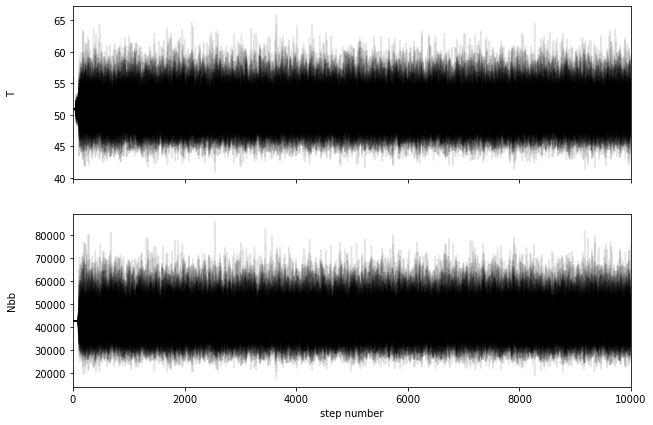

In [49]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["T", "Nbb"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [114]:
tau = sampler.get_autocorr_time()
print(tau)

flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
print(flat_samples.shape)

(9792, 2)


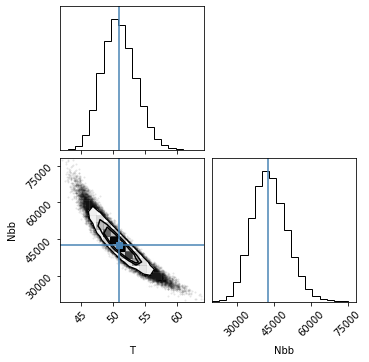

In [54]:
fig = corner.corner(
    flat_samples, labels=labels, truths=[results_1.loc[14,'Tdust'],results_1.loc[14,'Norm']]
);

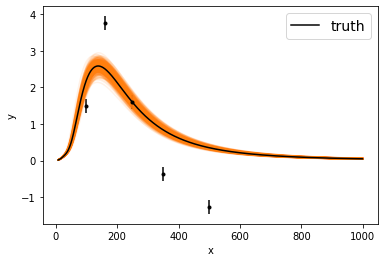

In [64]:
inds = np.random.randint(len(flat_samples), size=500)
x_new = np.arange(8,1000)
for ind in inds:
    sample = flat_samples[ind]
    #print(sample)
    plt.plot(x_new, model(([sample[0],sample[1]]),x_new/1.55)*1000, "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k")#, capsize=0)
plt.plot(x_new,model((results_1.loc[14,'Tdust'],results_1.loc[14,'Norm']),x_new/1.55)*1000, "k", label="truth")
plt.legend(fontsize=14,loc='upper right')
#plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [61]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [43]:
def SFR_MCMC(z_obj,Tdust,Norm,S1,S2,S3,S4,S5,unc1,unc2,unc3,unc4,unc5):
    
    if Norm<=0:
        return np.nan, np.nan, np.nan, np.nan
    else:
        x = np.array([100.,160.,250.,350.,500.])/(1+z_obj) # shift wavelengths to rest-frame
        y = np.array([S1,S2,S3,S4,S5])*10**-3 # data is in mJy
        yerr = np.array([unc1,unc2,unc3,unc4,unc5])*10**-3
        initial = np.array([Tdust,Norm])
        print('Initial values: ',initial)
    
        ndim = len(initial)
        nwalkers = 32
        p0 = [initial + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
        sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
        sampler.run_mcmc(p0, 10000, progress=True);
    
        tau = sampler.get_autocorr_time()
        print('Autocorrelation time: ',tau)
        flat_samples = sampler.get_chain(discard=np.floor(tau[0]*3).astype(int), thin=np.floor(tau[0]/2).astype(int), flat=True)
        print('Chain shape: ',flat_samples.shape)
    
        inds = np.random.randint(len(flat_samples), size=500)
        LIR_list=[]
        SFR_list=[]
        for ind in inds:
            sample = flat_samples[ind]
            dist_factor = 4*np.pi*(cosmo.luminosity_distance(z_obj).to(u.meter).value)**2  # distance is in Mpc
            integral, abserr = quad(lambda x: GreybodyPL(x,sample[0],sample[1])/(x**2),8,1000) # c/lambda^2 factor gives flux density per unit wavelength
            LIR = integral*3*(10**-12)*dist_factor  # 3*(10^8)*(10^-26)*(10^6)
                                                #    c    *   Jy   * 1/micron
            LIR_LSun = LIR/(3.828*10**26)    
            LIR_list.append(np.log10(LIR_LSun))
            SFR_list.append(LIR_LSun/(1.7*5.8*10**9)) # Kennicutt 1998 + Man 2016
        print('LIR: ',np.percentile(LIR_list,[16,50,84]))
        print('SFR: ',np.percentile(SFR_list,[16,50,84]))
        SFR_diff = np.diff(np.percentile(SFR_list,[16,50,84]))
        print('SFR diff: ',SFR_diff,'\n')
    
        return np.median(LIR_list), np.median(SFR_list), SFR_diff[0], SFR_diff[1]

SFR_MCMC_v = np.vectorize(SFR_MCMC)

In [44]:
for n in range(len(results)):
    try:
        results.loc[n,'LIR_median'], results.loc[n,'SFR_median'], results.loc[n,'SFR_lower'], results.loc[n,'SFR_upper'] = SFR_MCMC(results.loc[n,'Median_redshift'],results.loc[n,'Tdust'],results.loc[n,'Norm'],results.loc[n,'100_flux(mJy)'],results.loc[n,'160_flux(mJy)'],results.loc[n,'250_flux(mJy)'],results.loc[n,'350_flux(mJy)'],results.loc[n,'500_flux(mJy)'],results.loc[n,'100_std(mJy)'],results.loc[n,'160_std(mJy)'],results.loc[n,'250_std(mJy)'],results.loc[n,'350_std(mJy)'],results.loc[n,'500_std(mJy)'])
        if (np.isnan(results.loc[n,'LIR_median'])):
            print('Negative value at : ',n,'\n')
        else:
            print('Success at : ',n,'\n')
    except:
        print('Failed at : ',n,'\n')

Initial values:  [3.36345751e+01 3.22107965e+05]


100%|██████████| 10000/10000 [00:56<00:00, 178.55it/s]


Autocorrelation time:  [38.76057808 37.19642167]
Chain shape:  (16640, 2)


  0%|          | 20/10000 [00:00<00:52, 190.51it/s]

LIR:  [11.00182377 11.1040087  11.18601669]
SFR:  [10.18469656 12.88640538 15.56466525]
SFR diff:  [2.70170882 2.67825987] 

Success at :  0 

Initial values:  [3.42542244e+01 1.20390309e+06]


  3%|▎         | 315/10000 [00:01<00:51, 186.35it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
  6%|▌         | 583/10000 [00:03<00:47, 197.80it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
  0%|          | 19/10000 [00:00<00:55, 178.50it/s]

Failed at :  1 

Initial values:  [4.33505199e+01 7.91008466e+05]


 75%|███████▍  | 7462/10000 [00:34<00:11, 217.29it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 75%|███████▍  | 7484/10000 [00:34<00:13, 182.14it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
 76%|███████▌  | 7570/10000 [00:34<00:11, 202.60it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 10000/10000 [00:46<00:00, 216.52it/s]
/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:35: RuntimeWarning: overflow encountered in multiply
  acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
/home/brun

Failed at :  2 

Initial values:  [2.99265168e+01 8.60068394e+05]


100%|██████████| 10000/10000 [00:55<00:00, 178.85it/s]


Autocorrelation time:  [66.71714253 80.59746111]
Chain shape:  (9472, 2)


  0%|          | 17/10000 [00:00<00:58, 169.57it/s]

LIR:  [11.96613643 12.04008513 12.10954372]
SFR:  [ 93.81231378 111.22652271 130.51691573]
SFR diff:  [17.41420893 19.29039303] 

Success at :  3 

Initial values:  [2.83703357e+01 1.89386726e+06]


  0%|          | 19/10000 [00:00<00:53, 186.47it/s]

Failed at :  4 

Initial values:  [4.24065780e+01 4.86725604e+05]


100%|██████████| 10000/10000 [00:56<00:00, 177.12it/s]


Autocorrelation time:  [38.20820467 39.84105523]
Chain shape:  (16640, 2)


  0%|          | 15/10000 [00:00<01:07, 146.87it/s]

LIR:  [12.41289424 12.44361058 12.47307704]
SFR:  [262.43232425 281.66553062 301.43947903]
SFR diff:  [19.23320637 19.77394841] 

Success at :  5 

Initial values:  [3.41867749e+01 1.04891397e+06]


100%|██████████| 10000/10000 [00:54<00:00, 183.60it/s]


Autocorrelation time:  [76.35935954 87.424423  ]
Chain shape:  (8224, 2)


  0%|          | 14/10000 [00:00<01:11, 139.42it/s]

LIR:  [12.16715513 12.2790109  12.36251631]
SFR:  [149.03155859 192.81196889 233.6896088 ]
SFR diff:  [43.78041031 40.87763991] 

Success at :  6 

Negative value at :  7 

Negative value at :  8 

Negative value at :  9 

Initial values:  [4.47820638e+01 3.34955886e+05]


  0%|          | 19/10000 [00:00<00:54, 181.66it/s]

Failed at :  10 

Negative value at :  11 

Negative value at :  12 

Negative value at :  13 

Negative value at :  14 

Negative value at :  15 

Negative value at :  16 

Negative value at :  17 

Negative value at :  18 

Initial values:  [nan nan]
Failed at :  19 

Negative value at :  20 

Negative value at :  21 

Negative value at :  22 

Negative value at :  23 

Negative value at :  24 

Negative value at :  25 

Negative value at :  26 

Initial values:  [   57.04981168 11681.40917273]


100%|██████████| 10000/10000 [00:55<00:00, 181.40it/s]


Autocorrelation time:  [53.38572874 50.03128223]
Chain shape:  (12096, 2)


  0%|          | 18/10000 [00:00<00:56, 175.16it/s]

LIR:  [10.63040229 10.70419336 10.78045692]
SFR:  [4.33037374 5.13235643 6.11758497]
SFR diff:  [0.80198268 0.98522855] 

Success at :  27 

Initial values:  [3.84186701e+01 4.40371490e+04]


100%|██████████| 10000/10000 [00:54<00:00, 184.49it/s]


Autocorrelation time:  [ 90.11901712 112.18838175]
Chain shape:  (6912, 2)


  0%|          | 0/10000 [00:00<?, ?it/s]/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  1%|          | 52/10000 [00:00<00:19, 513.49it/s]

LIR:  [10.94693697 11.01512904 11.07240248]
SFR:  [ 8.97552974 10.5015191  11.9818966 ]
SFR diff:  [1.52598936 1.4803775 ] 

Success at :  28 

Negative value at :  29 

Initial values:  [ 171.29247881 2655.98855279]


100%|██████████| 10000/10000 [00:15<00:00, 653.94it/s]
/home/bruno/anaconda3/lib/python3.7/site-packages/emcee/backends/backend.py:53: RuntimeWarning: overflow encountered in long_scalars
  v = getattr(self, name)[discard + thin - 1 : self.iteration : thin]
  0%|          | 37/10000 [00:00<00:56, 176.75it/s]

Autocorrelation time:  [nan nan]
Chain shape:  (0, 2)
Failed at :  30 

Initial values:  [4.33263026e+01 1.64728834e+05]


100%|██████████| 10000/10000 [00:54<00:00, 184.06it/s]


Autocorrelation time:  [107.98912662 135.37698037]
Chain shape:  (5824, 2)


  0%|          | 18/10000 [00:00<00:58, 169.59it/s]

LIR:  [11.75499902 11.85001598 11.92822942]
SFR:  [57.69287    71.80241905 85.9711068 ]
SFR diff:  [14.10954906 14.16868775] 

Success at :  31 

Negative value at :  32 

Initial values:  [1.7189862e+01 1.3982328e+07]


  0%|          | 38/10000 [00:00<00:53, 184.98it/s]

Failed at :  33 

Negative value at :  34 

Negative value at :  35 

Negative value at :  36 

Negative value at :  37 

Negative value at :  38 

Negative value at :  39 

Negative value at :  40 

Negative value at :  41 

Negative value at :  42 

Negative value at :  43 

Negative value at :  44 

Negative value at :  45 

Negative value at :  46 

Negative value at :  47 

Negative value at :  48 

Initial values:  [   64.83996551 16855.60129992]


100%|██████████| 10000/10000 [00:55<00:00, 180.40it/s]


Autocorrelation time:  [35.33462147 34.9952915 ]
Chain shape:  (18624, 2)


  0%|          | 17/10000 [00:00<00:58, 169.48it/s]

LIR:  [10.33056922 10.36176619 10.39054884]
SFR:  [2.17116245 2.33286321 2.49271098]
SFR diff:  [0.16170077 0.15984777] 

Success at :  49 

Negative value at :  50 

Negative value at :  51 

Initial values:  [3.86188912e+01 2.89436408e+05]


100%|██████████| 10000/10000 [00:55<00:00, 180.29it/s]


Autocorrelation time:  [30.64748442 30.57868771]
Chain shape:  (21120, 2)


  0%|          | 15/10000 [00:00<01:09, 142.92it/s]

LIR:  [10.65977793 10.66842629 10.67599077]
SFR:  [4.633413   4.72660575 4.80965425]
SFR diff:  [0.09319275 0.0830485 ] 

Success at :  52 

Initial values:  [   67.31469805 10149.86212443]


100%|██████████| 10000/10000 [00:55<00:00, 180.04it/s]


Autocorrelation time:  [32.11592888 32.5170215 ]
Chain shape:  (19808, 2)


  0%|          | 36/10000 [00:00<00:56, 175.30it/s]

LIR:  [10.95164489 10.97302344 10.99526849]
SFR:  [ 9.07335653  9.53117685 10.03209363]
SFR diff:  [0.45782032 0.50091678] 

Success at :  53 

Initial values:  [  83.0227112  3175.21113932]


100%|██████████| 10000/10000 [00:55<00:00, 180.98it/s]


Autocorrelation time:  [35.6732185 34.8865863]
Chain shape:  (18592, 2)


  0%|          | 37/10000 [00:00<00:55, 180.01it/s]

LIR:  [11.22156942 11.25726379 11.28782026]
SFR:  [16.89244629 18.33947492 19.67629746]
SFR diff:  [1.44702863 1.33682254] 

Success at :  54 

Initial values:  [3.32418030e+01 8.43163634e+05]


100%|██████████| 10000/10000 [00:56<00:00, 177.62it/s]


Autocorrelation time:  [29.41780354 29.30966643]
Chain shape:  (22656, 2)


  0%|          | 18/10000 [00:00<00:57, 172.80it/s]

LIR:  [10.85745348 10.86542868 10.87312378]
SFR:  [7.30426581 7.43963726 7.5726323 ]
SFR diff:  [0.13537145 0.13299503] 

Success at :  55 

Initial values:  [3.94197318e+01 2.19288006e+05]


100%|██████████| 10000/10000 [00:55<00:00, 181.06it/s]


Autocorrelation time:  [31.35410441 32.00229009]
Chain shape:  (21120, 2)


  0%|          | 38/10000 [00:00<00:54, 182.57it/s]

LIR:  [11.35893568 11.36475713 11.37121187]
SFR:  [23.17708242 23.48984855 23.84157585]
SFR diff:  [0.31276613 0.3517273 ] 

Success at :  56 

Initial values:  [4.16345121e+01 1.37344855e+05]


100%|██████████| 10000/10000 [00:55<00:00, 179.75it/s]


Autocorrelation time:  [29.93965772 30.44376744]
Chain shape:  (22624, 2)


  0%|          | 18/10000 [00:00<00:59, 168.54it/s]

LIR:  [11.68656038 11.6954707  11.70217248]
SFR:  [49.28144863 50.30298779 51.08525444]
SFR diff:  [1.02153915 0.78226665] 

Success at :  57 

Initial values:  [2.88296931e+01 1.64590459e+06]


100%|██████████| 10000/10000 [00:55<00:00, 180.03it/s]


Autocorrelation time:  [41.16308247 41.58841262]
Chain shape:  (15776, 2)


  0%|          | 19/10000 [00:00<00:54, 182.33it/s]

LIR:  [10.88638952 10.9299118  10.96851484]
SFR:  [7.80751171 8.63047869 9.43274138]
SFR diff:  [0.82296698 0.80226269] 

Success at :  58 

Initial values:  [3.55857855e+01 6.33555820e+05]


100%|██████████| 10000/10000 [00:56<00:00, 178.11it/s]


Autocorrelation time:  [32.28433278 31.88350167]
Chain shape:  (19808, 2)


  0%|          | 16/10000 [00:00<01:04, 155.99it/s]

LIR:  [11.65139318 11.66287425 11.67337481]
SFR:  [45.44815536 46.66565177 47.80770544]
SFR diff:  [1.21749642 1.14205366] 

Success at :  59 

Initial values:  [3.62597289e+01 5.40086665e+05]


100%|██████████| 10000/10000 [00:55<00:00, 180.01it/s]


Autocorrelation time:  [32.46501174 32.47521926]
Chain shape:  (19776, 2)


  0%|          | 17/10000 [00:00<00:58, 169.76it/s]

LIR:  [12.06556064 12.07467403 12.08303294]
SFR:  [117.94613735 120.44731261 122.78802821]
SFR diff:  [2.50117526 2.3407156 ] 

Success at :  60 

Initial values:  [2.31321038e+01 1.03916687e+06]


100%|██████████| 10000/10000 [00:55<00:00, 180.25it/s]


Autocorrelation time:  [151.63129018 181.47419717]
Chain shape:  (4064, 2)


  0%|          | 18/10000 [00:00<00:56, 177.69it/s]

LIR:  [10.307581   10.30758101 10.30758101]
SFR:  [2.05922636 2.05922638 2.05922639]
SFR diff:  [1.53865276e-08 1.56055724e-08] 

Success at :  61 

Initial values:  [4.5643185e+01 3.0486735e+05]


  0%|          | 38/10000 [00:00<00:54, 182.69it/s]

Failed at :  62 

Initial values:  [3.78203989e+01 4.90034258e+05]


100%|██████████| 10000/10000 [00:53<00:00, 186.06it/s]


Autocorrelation time:  [168.66208859 183.99474941]
Chain shape:  (3616, 2)
LIR:  [12.0457962  12.14753868 12.25375727]
SFR:  [112.69892083 142.44978751 181.91996152]
SFR diff:  [29.75086667 39.47017402] 

Success at :  63 

Negative value at :  64 



In [45]:
results['SFR_ratio']=results['SFR_lofar']/results['SFR_median']
results['SFR_ratio_unc']=np.sqrt( (results['SFR_ratio']**2)*((results['SFR_lofar_unc']/results['SFR_lofar'])**2 + (results['SFR_upper']/results['SFR_median'])**2) )

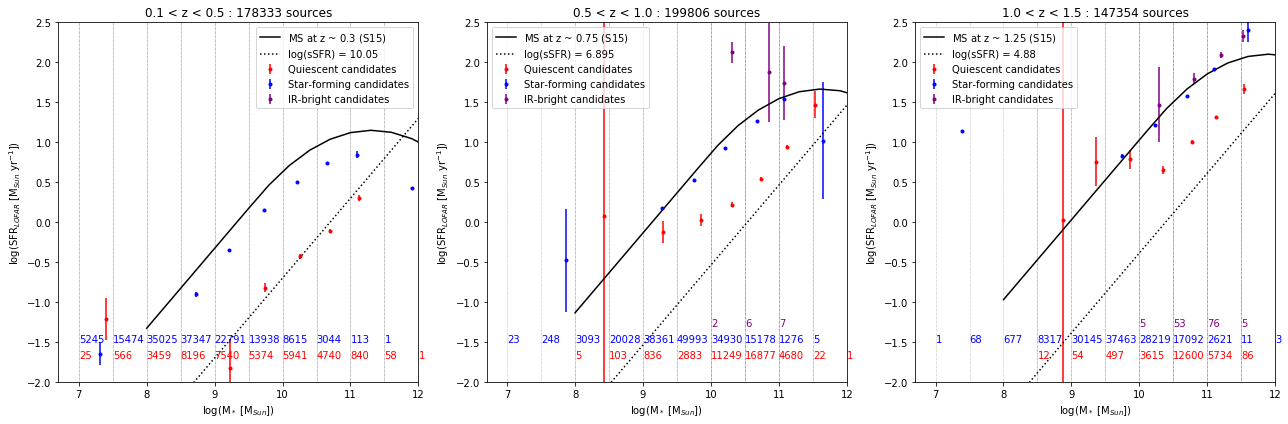

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age_1,age_2,age_3],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']),
                   yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_unc']/(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']),
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_unc']/(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']),
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_unc']/(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {age:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
    #axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

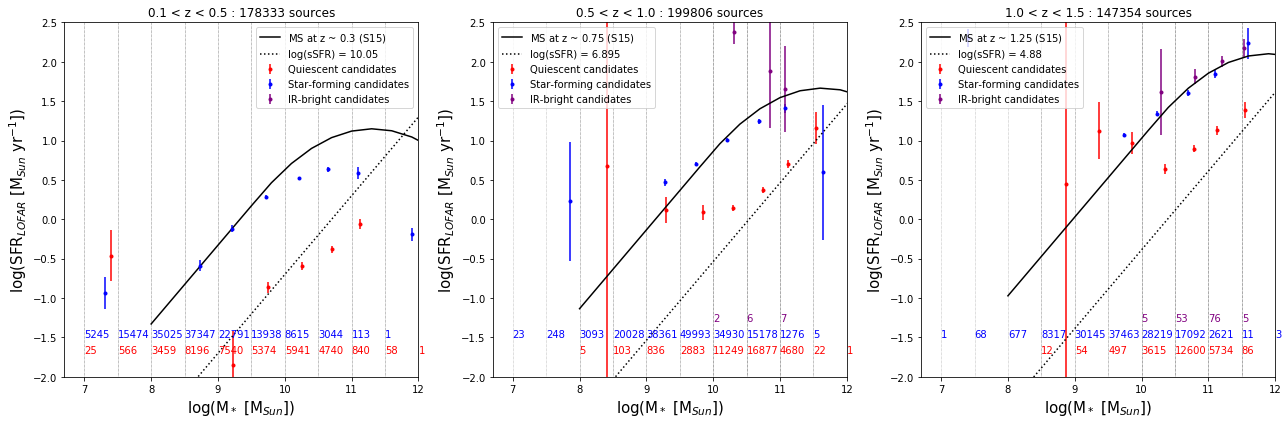

In [51]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age_1,age_2,age_3],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=15)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']),
                   yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M_unc']/(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']),
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M_unc']/(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']),
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M_unc']/(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {age:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
    #axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

In [79]:
results.loc[results['Type']=='SFG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
34,SFG,7.313531,5245,-0.215213,-0.119695,-3.123322,-3.328230,-2.505588,11.387401,-1.359816e+07,NaN,NaN
35,SFG,7.395454,23,-1.603481,-3.979781,-2.814502,-2.986657,-3.450749,27.355017,-5.666048e+05,NaN,NaN
36,SFG,7.395524,1,-13.893229,-2.239126,-6.910786,-5.400008,-1.157762,248.255768,-3.453653e+03,NaN,NaN
37,SFG,7.813471,15474,-0.003861,-0.360550,-3.443856,-3.719418,-2.949751,11.782361,-1.338482e+07,NaN,NaN
38,SFG,7.864479,248,-0.241653,-3.320152,-4.318962,-5.024062,-3.824348,20.574197,-2.034956e+06,NaN,NaN
39,SFG,7.920468,68,-0.590137,-5.119051,-3.907211,-3.959586,-2.109997,43.548864,-1.329965e+05,NaN,NaN
40,SFG,8.283108,35025,-0.293177,-0.371848,-3.422526,-3.720376,-2.770338,12.809492,-9.327798e+06,NaN,NaN
41,SFG,8.386322,3093,-0.665982,-0.223288,-3.622995,-3.607883,-2.645434,16.806804,-3.103386e+06,NaN,NaN
42,SFG,8.364944,677,-0.327083,-1.376020,-4.282685,-4.317771,-2.973690,28.545819,-5.076226e+05,NaN,NaN
43,SFG,8.727292,37347,-0.033750,-0.054283,-2.723136,-3.044907,-2.259668,12.795738,-7.536576e+06,NaN,NaN


In [49]:
results.loc[results['Type']=='QG',['Type','Median_mass','Count','100_flux(mJy)','160_flux(mJy)','250_flux(mJy)','350_flux(mJy)','500_flux(mJy)','Tdust','Norm','LIR_H','SFR_H']]

,Type,Median_mass,Count,100_flux(mJy),160_flux(mJy),250_flux(mJy),350_flux(mJy),500_flux(mJy),Tdust,Norm,LIR_H,SFR_H
7,QG,7.396254,25,2.142651,-0.918384,-1.450049,-2.196473,-1.760863,9.903583,-1.519727e+07,NaN,NaN
8,QG,7.878830,566,-0.469347,-1.548605,-4.205962,-4.225476,-3.127843,12.355275,-1.295639e+07,NaN,NaN
9,QG,8.330666,3459,-0.713437,-1.399611,-4.386699,-4.398244,-3.264557,12.610062,-1.236289e+07,NaN,NaN
10,QG,8.418305,5,7.485112,16.293940,10.316931,3.798884,-3.188293,44.782064,3.349559e+05,11.445926,28.317136
11,QG,8.774096,8196,-0.506248,-0.718568,-3.629884,-3.835489,-2.769702,12.509793,-1.070814e+07,NaN,NaN
12,QG,8.900928,103,-0.107663,2.501810,-4.109107,-4.473516,-4.037006,13.431518,-9.499821e+06,NaN,NaN
13,QG,8.873606,12,6.327036,8.191111,-3.981578,-6.227388,-7.100859,15.705466,-7.650154e+06,NaN,NaN
14,QG,9.222692,7540,-0.229001,-0.304992,-3.031185,-3.254304,-2.298415,12.417690,-9.164839e+06,NaN,NaN
15,QG,9.300395,836,-0.617940,0.743344,-2.730223,-3.115373,-2.246494,15.305761,-3.636780e+06,NaN,NaN
16,QG,9.363929,54,-1.372976,2.851619,-2.966707,-4.639767,-4.056477,18.010624,-2.903216e+06,NaN,NaN


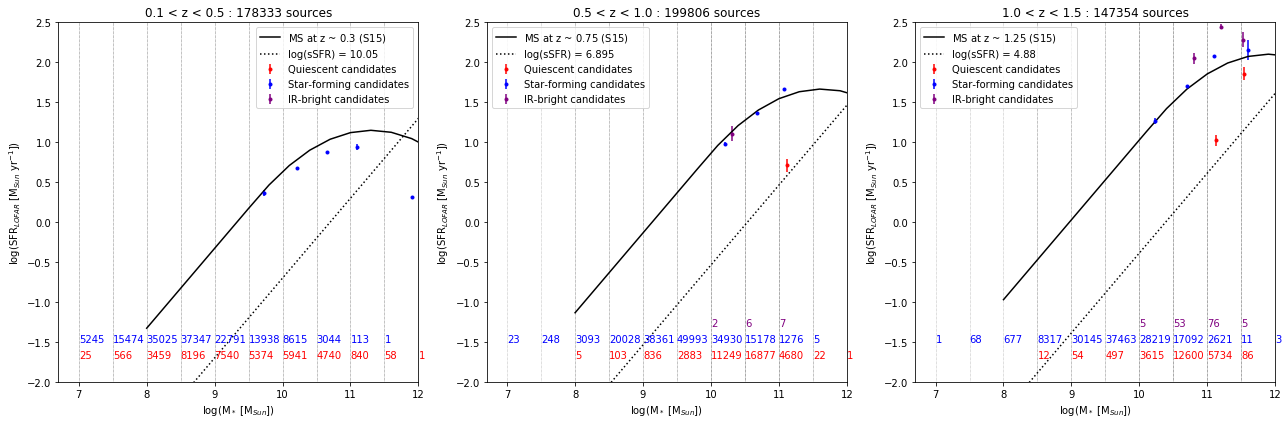

In [40]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age_1,age_2,age_3],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']),
                   yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_upper']/(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']),
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_upper']/(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']),
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_upper']/(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_median']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {age:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label='MS at 1.04 (Speagle 14)')
    #axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

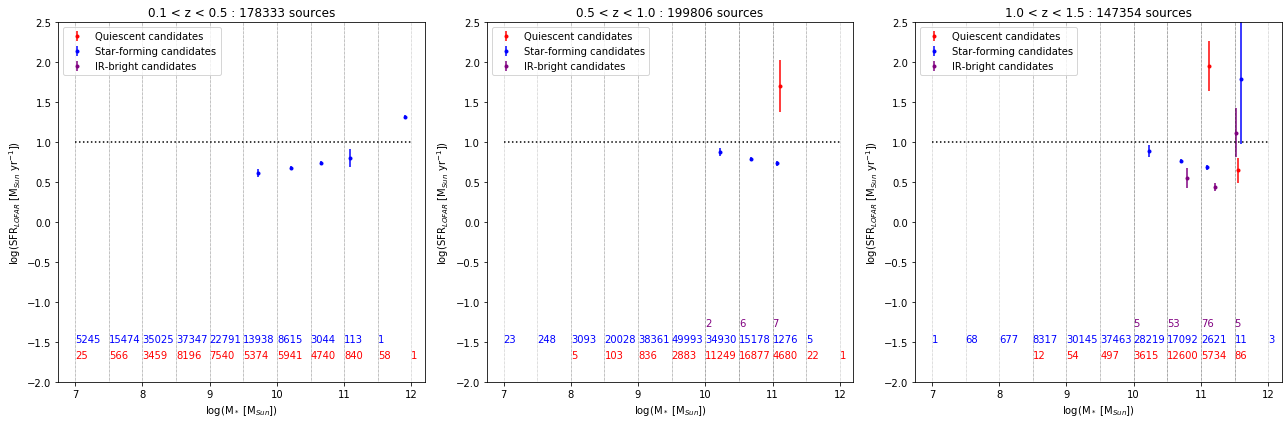

In [46]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='.',color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

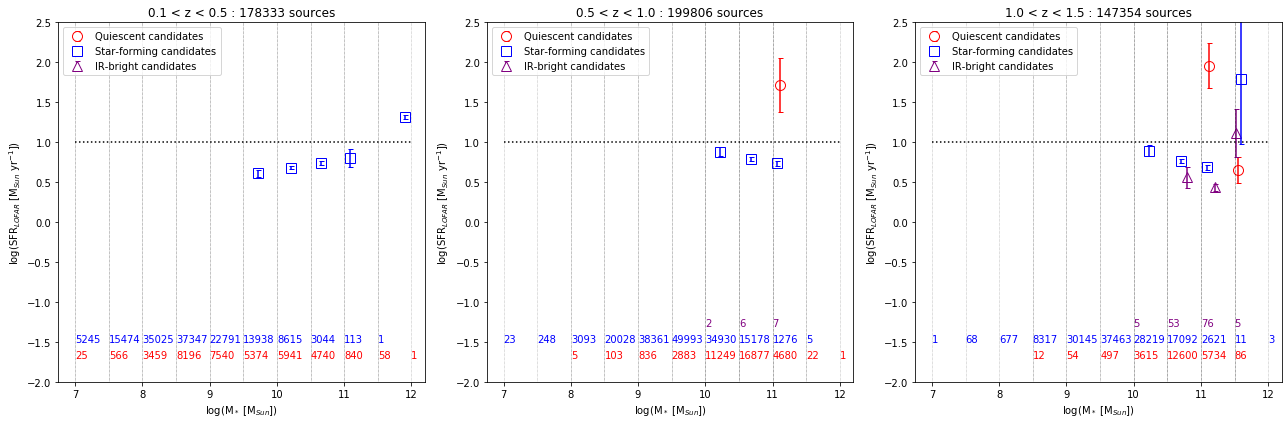

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent candidates')
    axs[i].errorbar(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming candidates')
    axs[i].errorbar(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                    results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio'],
                    yerr=results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_ratio_unc'],
                    fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

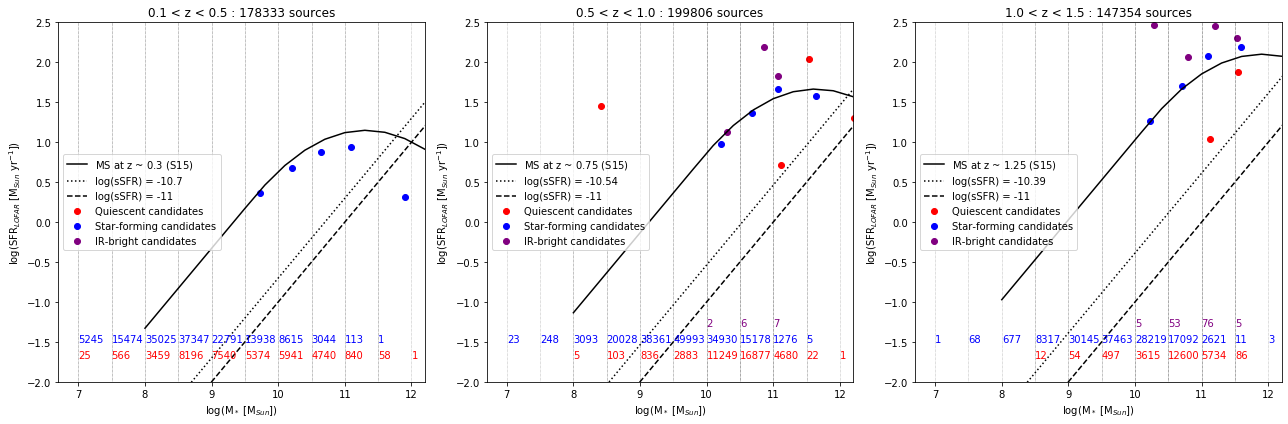

In [28]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   np.log10(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H']),
                   color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+age,13+age],':',color='k',label=f'log(sSFR) = {age:.4g}')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='center left')
fig.tight_layout()
plt.show()

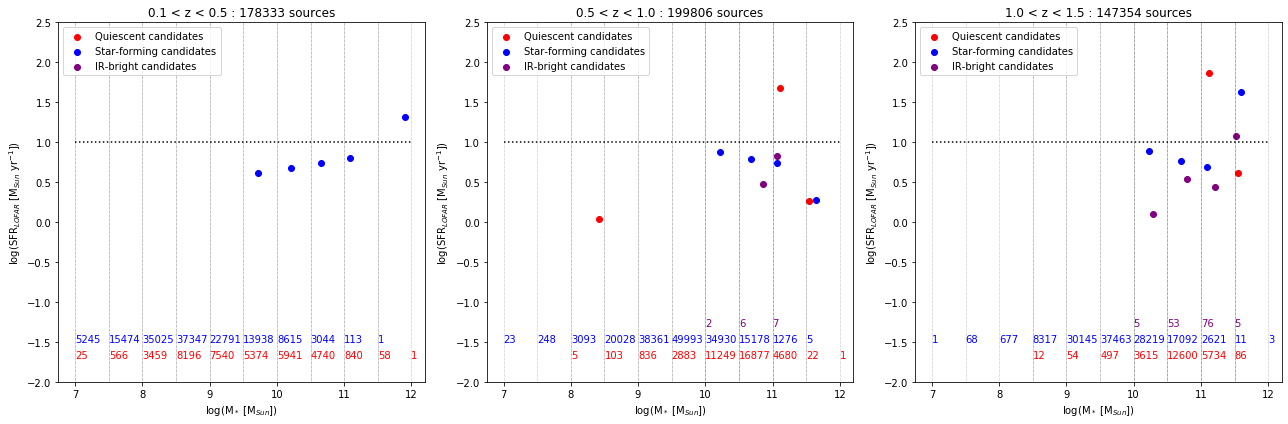

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[factor_1,factor_2,factor_3],[logSFR1,logSFR2,logSFR3]):
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].scatter(results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='QG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='r',label='Quiescent candidates')
    axs[i].scatter(results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='SFG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='b',label='Star-forming candidates')
    axs[i].scatter(results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],
                   results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_lofar']/results.loc[(results['Type']=='IRBQG')&(results['Median_redshift']>za)&(results['Median_redshift']<zb),'SFR_H'],
                   color='purple',label='IR-bright candidates')
    count = results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    axs[i].plot([7.,12.],[1.,1.],ls=':',color='k')
    for t,mass,n in zip(results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Type'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Median_mass'],results.loc[(results['Median_redshift']>za)&(results['Median_redshift']<zb),'Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12.2)
    axs[i].legend(numpoints=1, loc='upper left')
fig.tight_layout()
plt.show()

In [47]:
results.to_csv(path+"Bootes/Bootes_stack_full_results_NDWFS.csv",index=False)

In [46]:
results

,Type,Mass_range,Median_mass,Redshift_range,Median_redshift,Count,LOFAR_flux(mJy),LOFAR_std(mJy),100_flux(mJy),100_std(mJy),...,Tdust,Norm,LIR_H,SFR_H,LIR_median,SFR_median,SFR_lower,SFR_upper,SFR_ratio,SFR_ratio_unc
0,IRBQG,10.0 - 10.5,10.311464,0.5 - 1.0,0.72025,2,1.271388,0.400879,-6.064229,1.345327e+00,...,33.634575,3.221080e+05,11.117570,13.295151,11.104009,12.886405,2.701709e+00,2.678260e+00,10.393801,3.795748
1,IRBQG,10.0 - 10.5,10.289956,1.0 - 1.5,1.42520,5,0.047322,0.054105,4.937750,7.496409e+00,...,34.254224,1.203903e+06,12.455823,289.698417,NaN,NaN,NaN,NaN,NaN,NaN
2,IRBQG,10.5 - 11.0,10.856100,0.5 - 1.0,0.87890,6,0.421667,0.638868,11.739993,1.294989e+01,...,43.350520,7.910085e+05,12.185842,155.583906,NaN,NaN,NaN,NaN,NaN,NaN
3,IRBQG,10.5 - 11.0,10.800099,1.0 - 1.5,1.42400,53,0.105144,0.017524,-0.939651,1.658360e+00,...,29.926517,8.600684e+05,12.055358,115.207692,12.040085,111.226523,1.741421e+01,1.929039e+01,0.560091,0.132476
4,IRBQG,11.0 - 11.5,11.072286,0.5 - 1.0,0.91260,7,0.279690,0.314955,5.715042,5.511290e+00,...,28.370336,1.893867e+06,11.818673,66.802953,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,SFG,11.0 - 11.5,11.094974,1.0 - 1.5,1.25350,2621,0.193899,0.003021,2.470076,2.340020e-01,...,36.259729,5.400867e+05,12.075225,120.600254,12.074674,120.447313,2.501175e+00,2.340716e+00,0.684602,0.028638
61,SFG,11.5 - 12.0,11.909817,0.0 - 0.5,0.40550,1,0.081672,0.000000,-3.662153,8.673617e-16,...,23.132104,1.039167e+06,10.307555,2.059103,10.307581,2.059226,1.538653e-08,1.560557e-08,1.312307,0.024424
62,SFG,11.5 - 12.0,11.644589,0.5 - 1.0,0.66600,5,0.103941,0.184998,1.221876,4.677406e+00,...,45.643185,3.048674e+05,11.568974,37.592118,NaN,NaN,NaN,NaN,NaN,NaN
63,SFG,11.5 - 12.0,11.591896,1.0 - 1.5,1.34910,11,0.533296,0.203545,5.848268,2.754533e+00,...,37.820399,4.900343e+05,12.189515,156.905335,12.147539,142.449788,2.975087e+01,3.947017e+01,1.788583,0.816820


## OLDER PLOTS

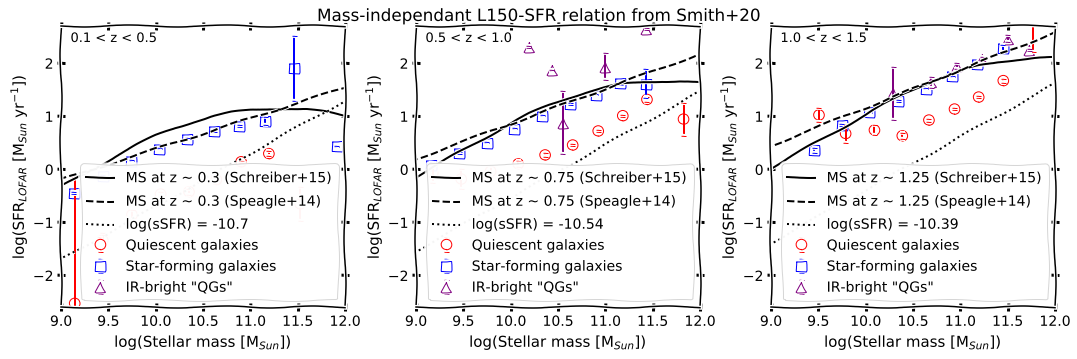

In [18]:
#%% Plotting Star formation rate vs Stellar mass
with plt.xkcd():
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    for i,za,zb in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5]):
        z = (za+zb)/2
        logSFR = m - 0.5 + (1.5*np.log10(1+z)) - 0.3*(np.fmax(m - 0.36-2.5*np.log10(1+z),np.zeros(len(m))))**2 # For plotting Schreiber+15 main sequence
        age = cosmo.age(z).value     # For plotting Speagle+14 main sequence
        factor = np.log10(0.2/age)-9 # For plotting Carnall+20 sSFR quiescent limit
        data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
        axs[i].set_xlabel("log(Stellar mass [M$_{Sun}$])",fontsize=15)
        axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=15)
        axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                       np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                       fmt='o',mfc='w',mec='r',ms=10,ecolor='r',barsabove=True,capsize=2.5,label='Quiescent galaxies')
        axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                       np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                       fmt='s',mfc='w',mec='b',ms=10,ecolor='b',barsabove=True,capsize=2.5,label='Star-forming galaxies')
        axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                        np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                       yerr=data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                       fmt='^',mfc='w',mec='purple',ms=10,ecolor='purple',barsabove=True,capsize=2.5,label='IR-bright "QGs"')
        axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${z}$ (Schreiber+15)')
        axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${z}$ (Speagle+14)')
        axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
        count = data['Count'].sum()
        axs[i].text(9.1,2.4,f'{za} < z < {zb}',size=13,color='k')
        axs[i].set_ylim(ymin=-2.6,ymax=2.7)
        axs[i].set_xlim(xmin=9,xmax=12.)
        axs[i].tick_params(which='both',top=True,right=True,direction='inout')
        axs[i].legend(numpoints=1, loc='lower right')
    fig.suptitle('Mass-independant L150-SFR relation from Smith+20',y=1)
    fig.tight_layout()
plt.show()

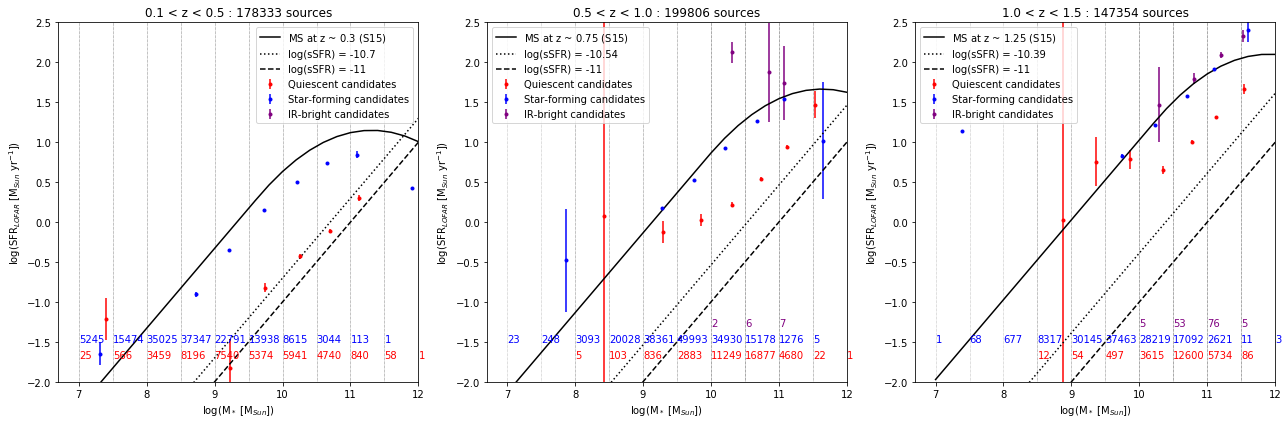

In [48]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

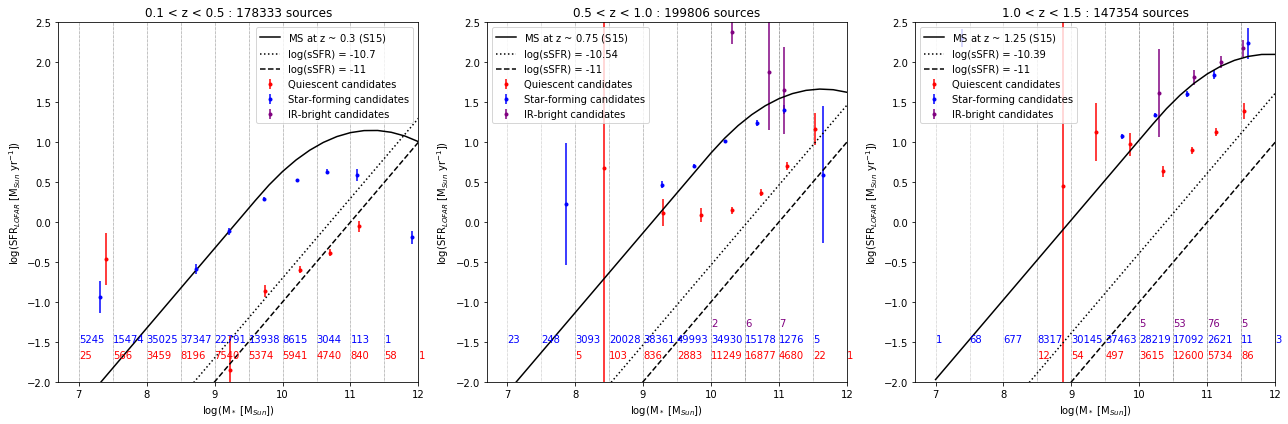

In [47]:
#%% Plotting Star formation rate vs Stellar mass
fig, axs = plt.subplots(1,3,figsize=(18,6))
for i,za,zb,age,factor,logSFR in zip([0,1,2],[0.1,0.5,1.],[0.5,1.,1.5],[age1,age2,age3],[factor1,factor2,factor3],[logSFR1,logSFR2,logSFR3]):
    data = results[(results['Median_redshift']>za)&(results['Median_redshift']<=zb)]
    axs[i].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    axs[i].set_ylabel("log(SFR$_{LOFAR}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
    axs[i].errorbar(data.loc[(data['Type']=='QG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='QG'),'SFR_lofar_M']),
                   yerr=data.loc[(data['Type']=='QG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='QG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='r',label='Quiescent candidates')
    axs[i].errorbar(data.loc[(data['Type']=='SFG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='SFG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='SFG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='b',label='Star-forming candidates')
    axs[i].errorbar(data.loc[(data['Type']=='IRBQG'),'Median_mass'],
                   np.log10(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']),
                   data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M_unc']/(data.loc[(data['Type']=='IRBQG'),'SFR_lofar_M']*np.log(10)),
                   fmt='.',color='purple',label='IR-bright candidates')
    axs[i].plot( m+9, logSFR, ls='-', c='k', label=f'MS at z ~ ${(za+zb)/2}$ (S15)')
    axs[i].plot([8,13],[8+factor,13+factor],':',color='k',label=f'log(sSFR) = {factor:.4g}')
    #axs[i].plot([8,12],[(0.84-0.026*age)*8-6.51+0.11*age,(0.84-0.026*age)*12-6.51+0.11*age],'--',color='k',label=f'MS at z ~ ${(za+zb)/2}$ (Speagle 14)')
    axs[i].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    count = data['Count'].sum()
    axs[i].set_title(f'{za} < z < {zb} : {count} sources',size=12,color='k')
    for t,mass,n in zip(data['Type'],data['Median_mass'],data['Count']):
        if t == 'QG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.7,f'{n}',c='r',size=10)
        elif t == 'SFG':
            axs[i].text(np.floor(mass/0.5)*0.5,-1.5,f'{n}',c='b',size=10)
        else:
            axs[i].text(np.floor(mass/0.5)*0.5,-1.3,f'{n}',c='purple',size=10)
        axs[i].axvline(np.floor(mass/0.5)*0.5,0,1,ls=':',lw=0.5,c='k',alpha=0.5)
    axs[i].set_ylim(ymin=-2,ymax=2.5)
    axs[i].set_xlim(xmax=12)
    axs[i].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()